### 패키지 및 데이터 불러오기

In [1]:
# 패키지 불러오기 
import matplotlib.pyplot as plt  # matplotlib.pyplot 패키지 불러오기 
import seaborn as sns   # seaborn 패키지 불어오기 
import warnings        # warings(경고 메시지 없애주는)패키지 불러오기 )
warnings.filterwarnings(action='ignore')

# 한글 폰트 설정
from matplotlib import rc
plt.rc('font', family='AppleGothic') # 맥 OS 폰트 설정 
plt.rc('axes', unicode_minus=False)  # 마이너스 폰트 설정

In [2]:
# sklearn explained 분산, 평균제곱오차, 결정계수, 선형회귀, 학습&테스트 데이터 분리 패키지 불러오기 
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression   
from sklearn.model_selection import train_test_split

In [3]:
# 데이터 프레임 모든열 이름 표시
pd.set_option('display.max_columns', None)

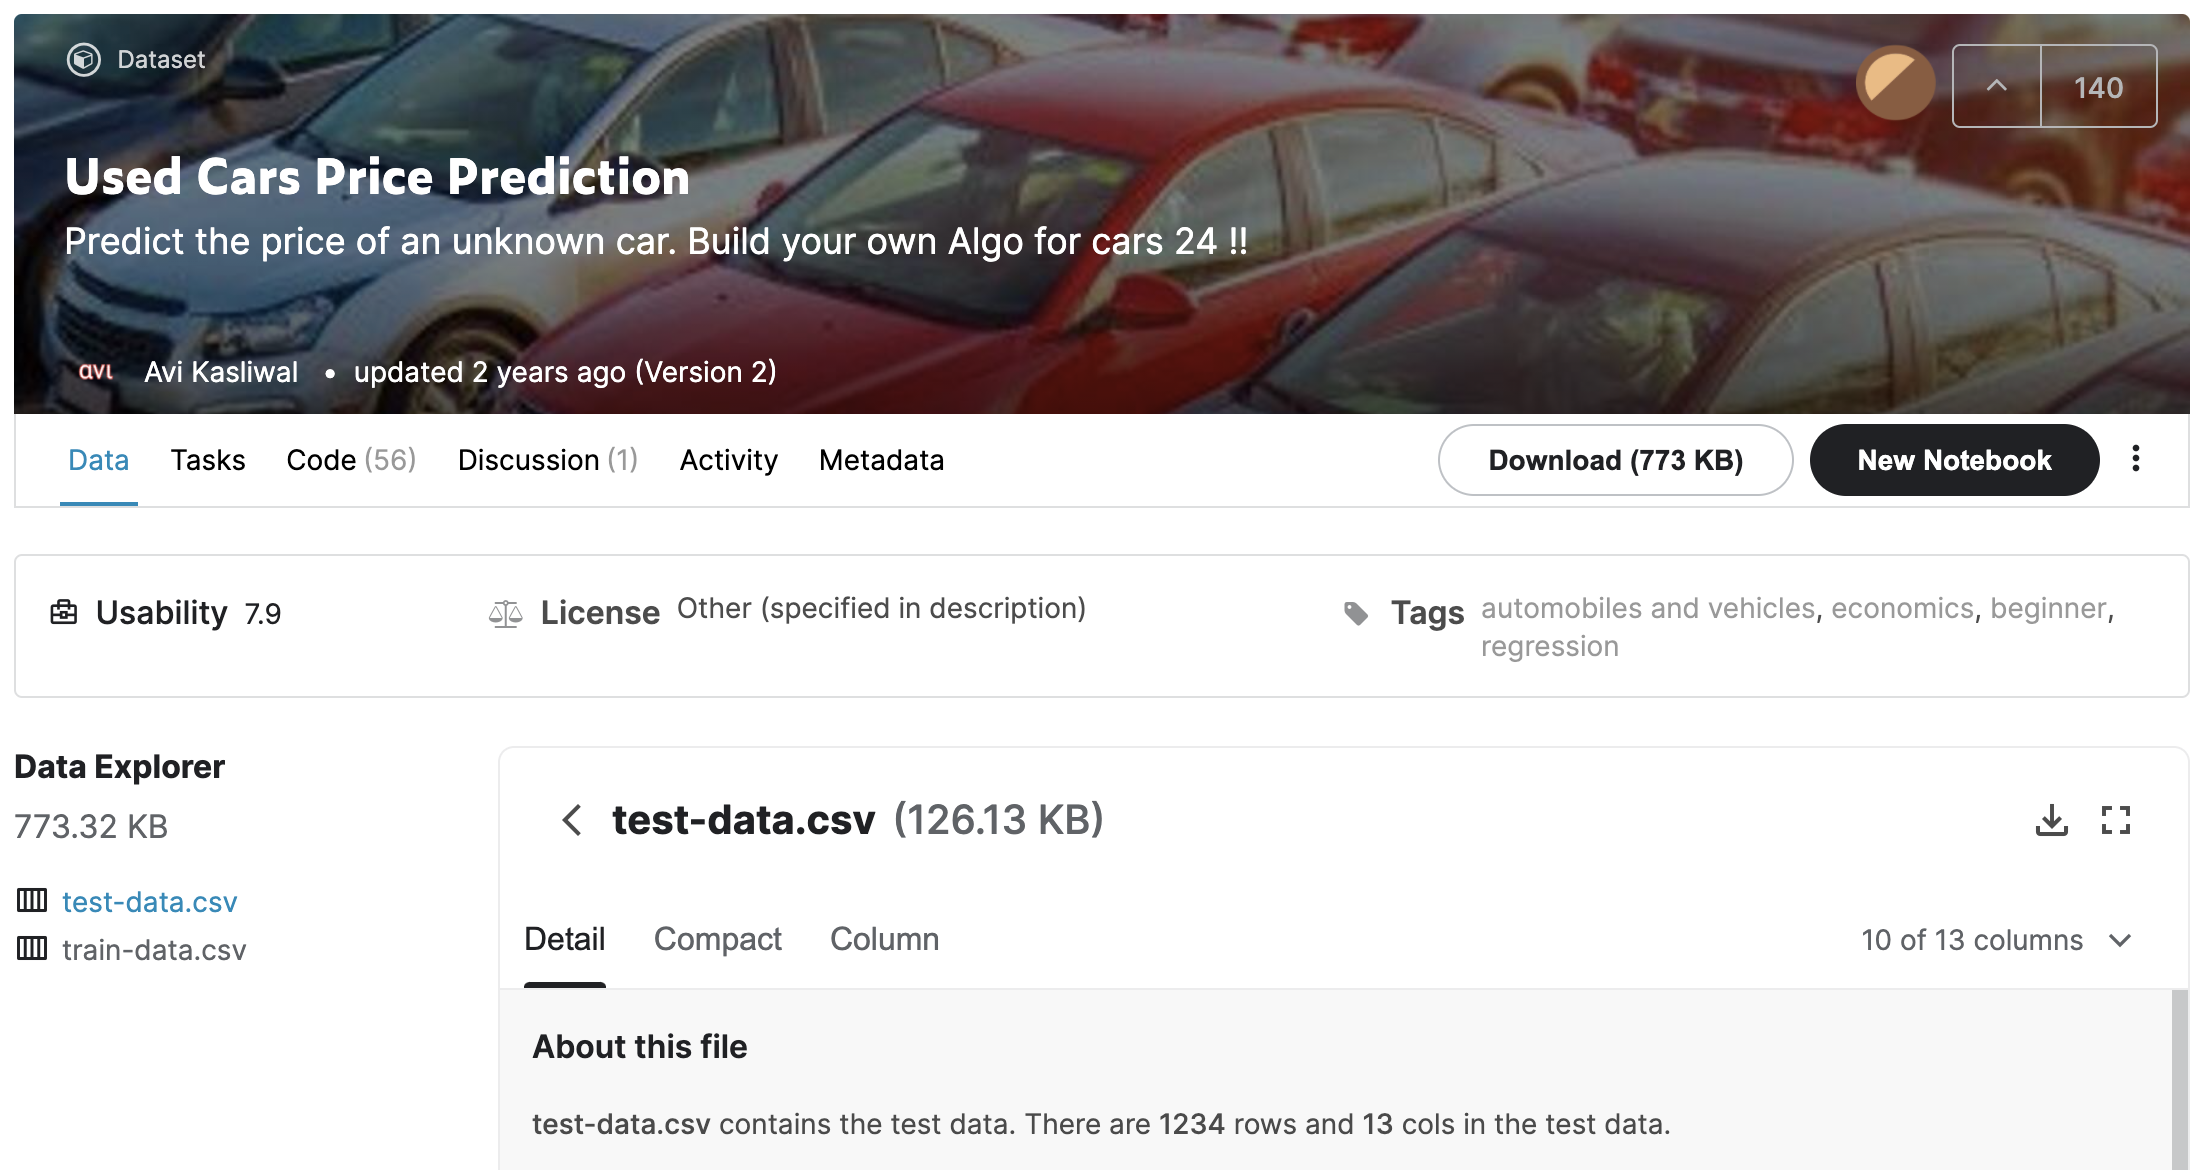
- 자료는 Kaggle 'Used car Price Prediction' train 데이터 사용 
- url - https://www.kaggle.com/avikasliwal/used-cars-price-prediction

In [4]:
# 데이터 불러오기 
car_t = pd.read_csv('./train_data_r.csv')  # row를 펼친 데이터
car_tr = pd.read_csv('./train_data_n.csv') # cr단위 변환

### 데이터 전처리

In [5]:
# Mileage null값 확인
## 2차종이 EV(전기차), 정확한 계산을 위해 제거 결정
car_t[car_t['Mileage'].isnull()]

Unnamed: 0                       Name Location  Year  Kilometers_Driven  \
4446        4446       Mahindra E Verito D4  Chennai  2016              50000   
4904        4904  Toyota Prius 2009-2016 Z4   Mumbai  2011              44000   

     Fuel_Type Transmission Owner_Type Mileage   Engine   Power  Seats  \
4446  Electric    Automatic      First     NaN    72 CC  41 bhp      5   
4904  Electric    Automatic      First     NaN  1798 CC  73 bhp      5   

       New_Price  Price  
4446  13.58 Lakh  13.00  
4904         NaN  12.75

In [6]:
# Mileage null값 제거
car_t = car_t.drop([4446, 4904])  # 4446번, 4904번 로우 제거 
car_t.reset_index(drop=True, inplace=True) # 인덱스 정렬해서 다시 설정

In [7]:
# 필요없는 컬럼 (중복 인덱스) 제거
car_t.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
# 단위제거 함수
def get_split(data, column, new):

    ls1 = data[column]
    ls2 = []
    for i in range(0,len(data)):
        ls2.append(ls1[i].split(' ')[0])
        
    data[new] = ls2
    print(new)
    
def get_split2(data, column, new):

    ls1 = data[column]
    ls2 = []
    for i in range(0,len(data)):
        ls2.append(ls1.str.split(' ', n=1)[i][1])
        
    data[new] = ls2
    print(new)

In [9]:
# 단위 제거가 필요한 컬럼 값들 단위 제거 
get_split(car_t, 'Name', 'Brand')
get_split2(car_t, 'Name', 'Car_name')
get_split(car_t, 'Mileage', 'Mile')
get_split(car_t, 'Engine', 'Eng')
get_split(car_t, 'Power', 'Pow')

Brand
Car_name
Mile
Eng
Pow


In [10]:
# Brand 중 'Isuzu', 'ISUZU' 같은 브랜드인데 중복됨
car_t['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [11]:
# 중복된 브랜드를 하나로 바꿔주기 
car_t['Brand'][car_t['Brand'] == 'ISUZU'] = 'Isuzu'

In [12]:
obj_col = ['Mile', 'Eng', 'Pow']
# 형변환
for i in obj_col:
    car_t[i] = car_t[i].astype(float)
    print(i)

Mile
Eng
Pow


In [13]:
# 판다스를 엑셀처럼 필터 조절해서 쓸 수 있는 패키지 (소소한 재미)
import qgrid
qgrid_widget = qgrid.show_grid(car_t,show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## 1. EDA

### 1-1. 데이터 탐색

#### 1) Brand

In [14]:
# 브랜드 분포 그래프
pd.DataFrame(car_t['Brand'].value_counts())

Brand
Maruti          1211
Hyundai         1107
Honda            608
Toyota           410
Mercedes-Benz    318
Volkswagen       315
Ford             300
Mahindra         271
BMW              267
Audi             236
Tata             186
Skoda            173
Renault          145
Chevrolet        121
Nissan            91
Land              60
Jaguar            40
Fiat              28
Mitsubishi        27
Mini              26
Volvo             21
Porsche           18
Jeep              15
Datsun            13
Force              3
Isuzu              3
Bentley            1
Smart              1
Lamborghini        1
Ambassador         1

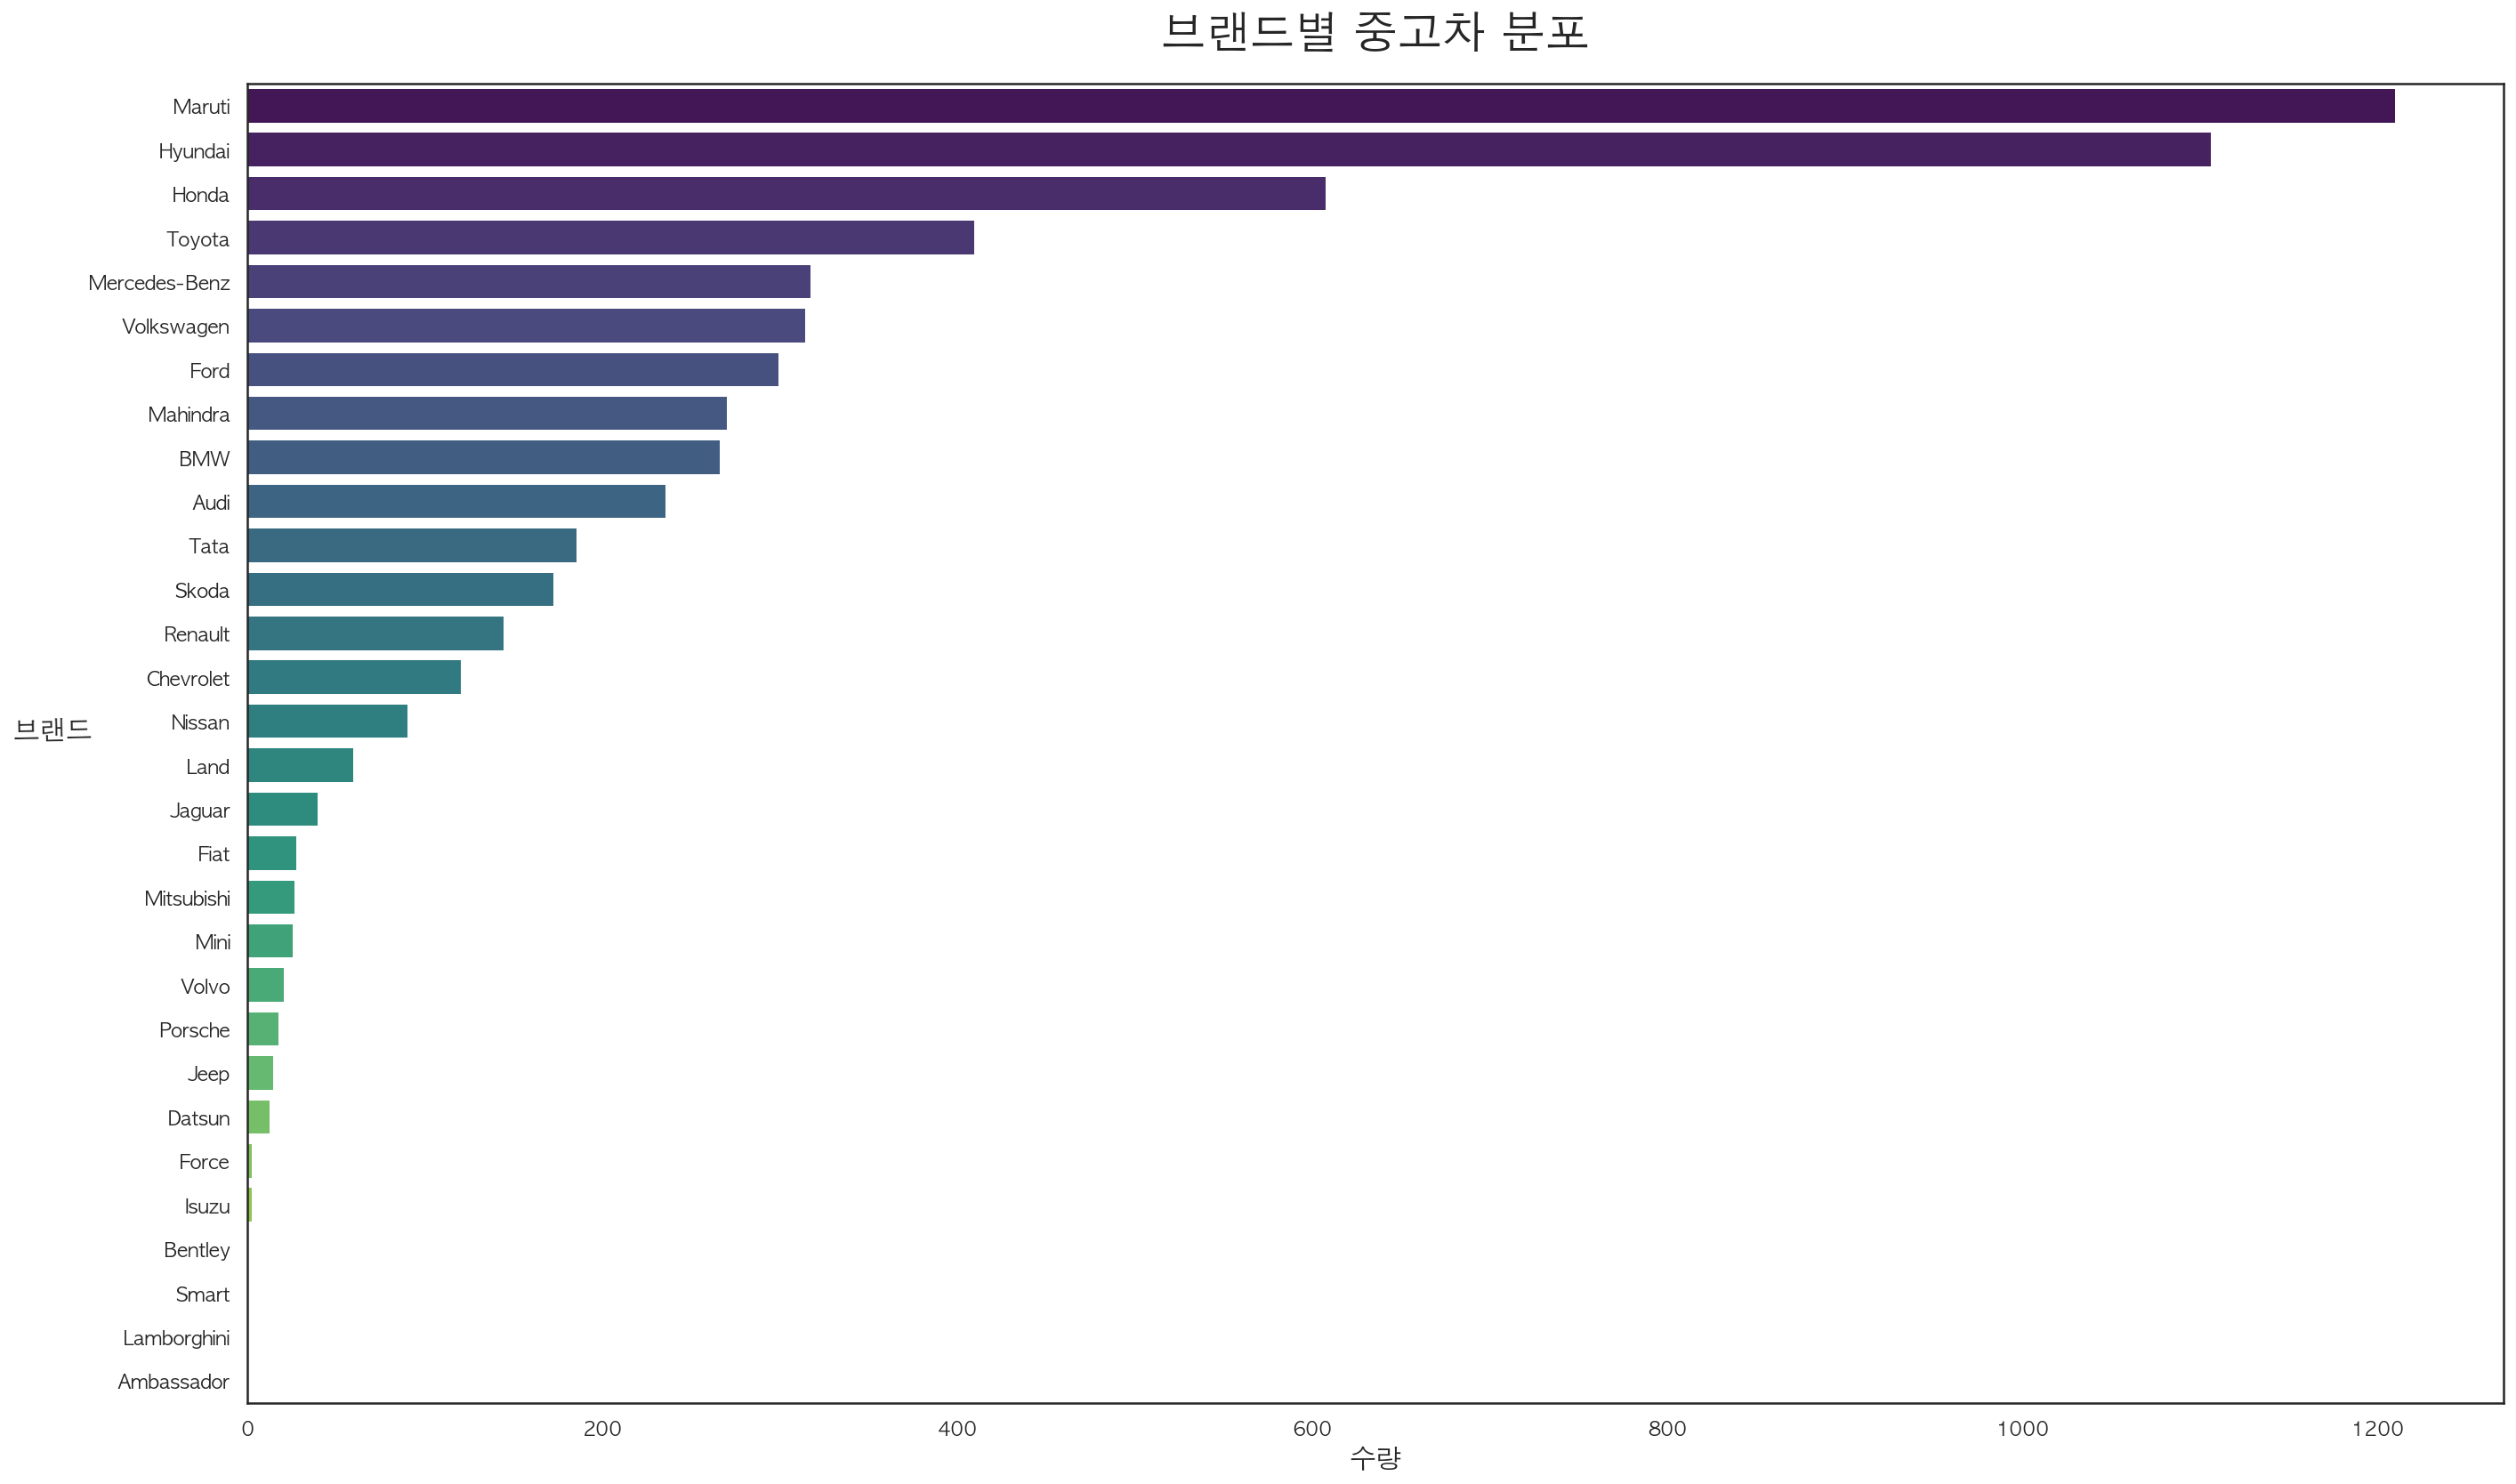

In [95]:
# 브랜드 분포 그래프
%matplotlib inline
plt.figure(figsize=(50, 30))      # 사이즈 50 x 50
plt.subplot(221)  # subplot 명령을 잡아 줌. 2*2로 subplot을 잡은 것 중 1번째 

sns.barplot(data=pd.DataFrame(car_t['Brand'].value_counts()).T,
           palette='viridis', ci=False, orient='h')     # 옆으로 꺽는 막대그래프 그리기 (orient='h')

plt.title('브랜드별 중고차 분포', fontsize=25, y=1.02)       # 그래프 제목 
plt.xlabel('수량', fontsize=15)                          # x축 폰트사이즈 설정
plt.ylabel('브랜드', fontsize=15, rotation=1, labelpad=20)  # y축 폰트사이즈, y축 두깨 설정 , 레이블 20pt 만큼의 여백 설정  

plt.show()

- 'Maruti' -> 'Hyundai' -> 'Honda' 순으로 가장 많이 팔림

#### 2) 연도

In [16]:
#  연도별 분포표
pd.DataFrame(car_t['Year'].value_counts()).sort_index(ascending=False) # 연식을 내림차순으로 정렬 (ascending=False)

Year
2019   102
2018   298
2017   587
2016   740
2015   744
2014   797
2013   649
2012   580
2011   465
2010   342
2009   198
2008   174
2007   125
2006    78
2005    57
2004    31
2003    17
2002    15
2001     8
2000     4
1999     2
1998     4

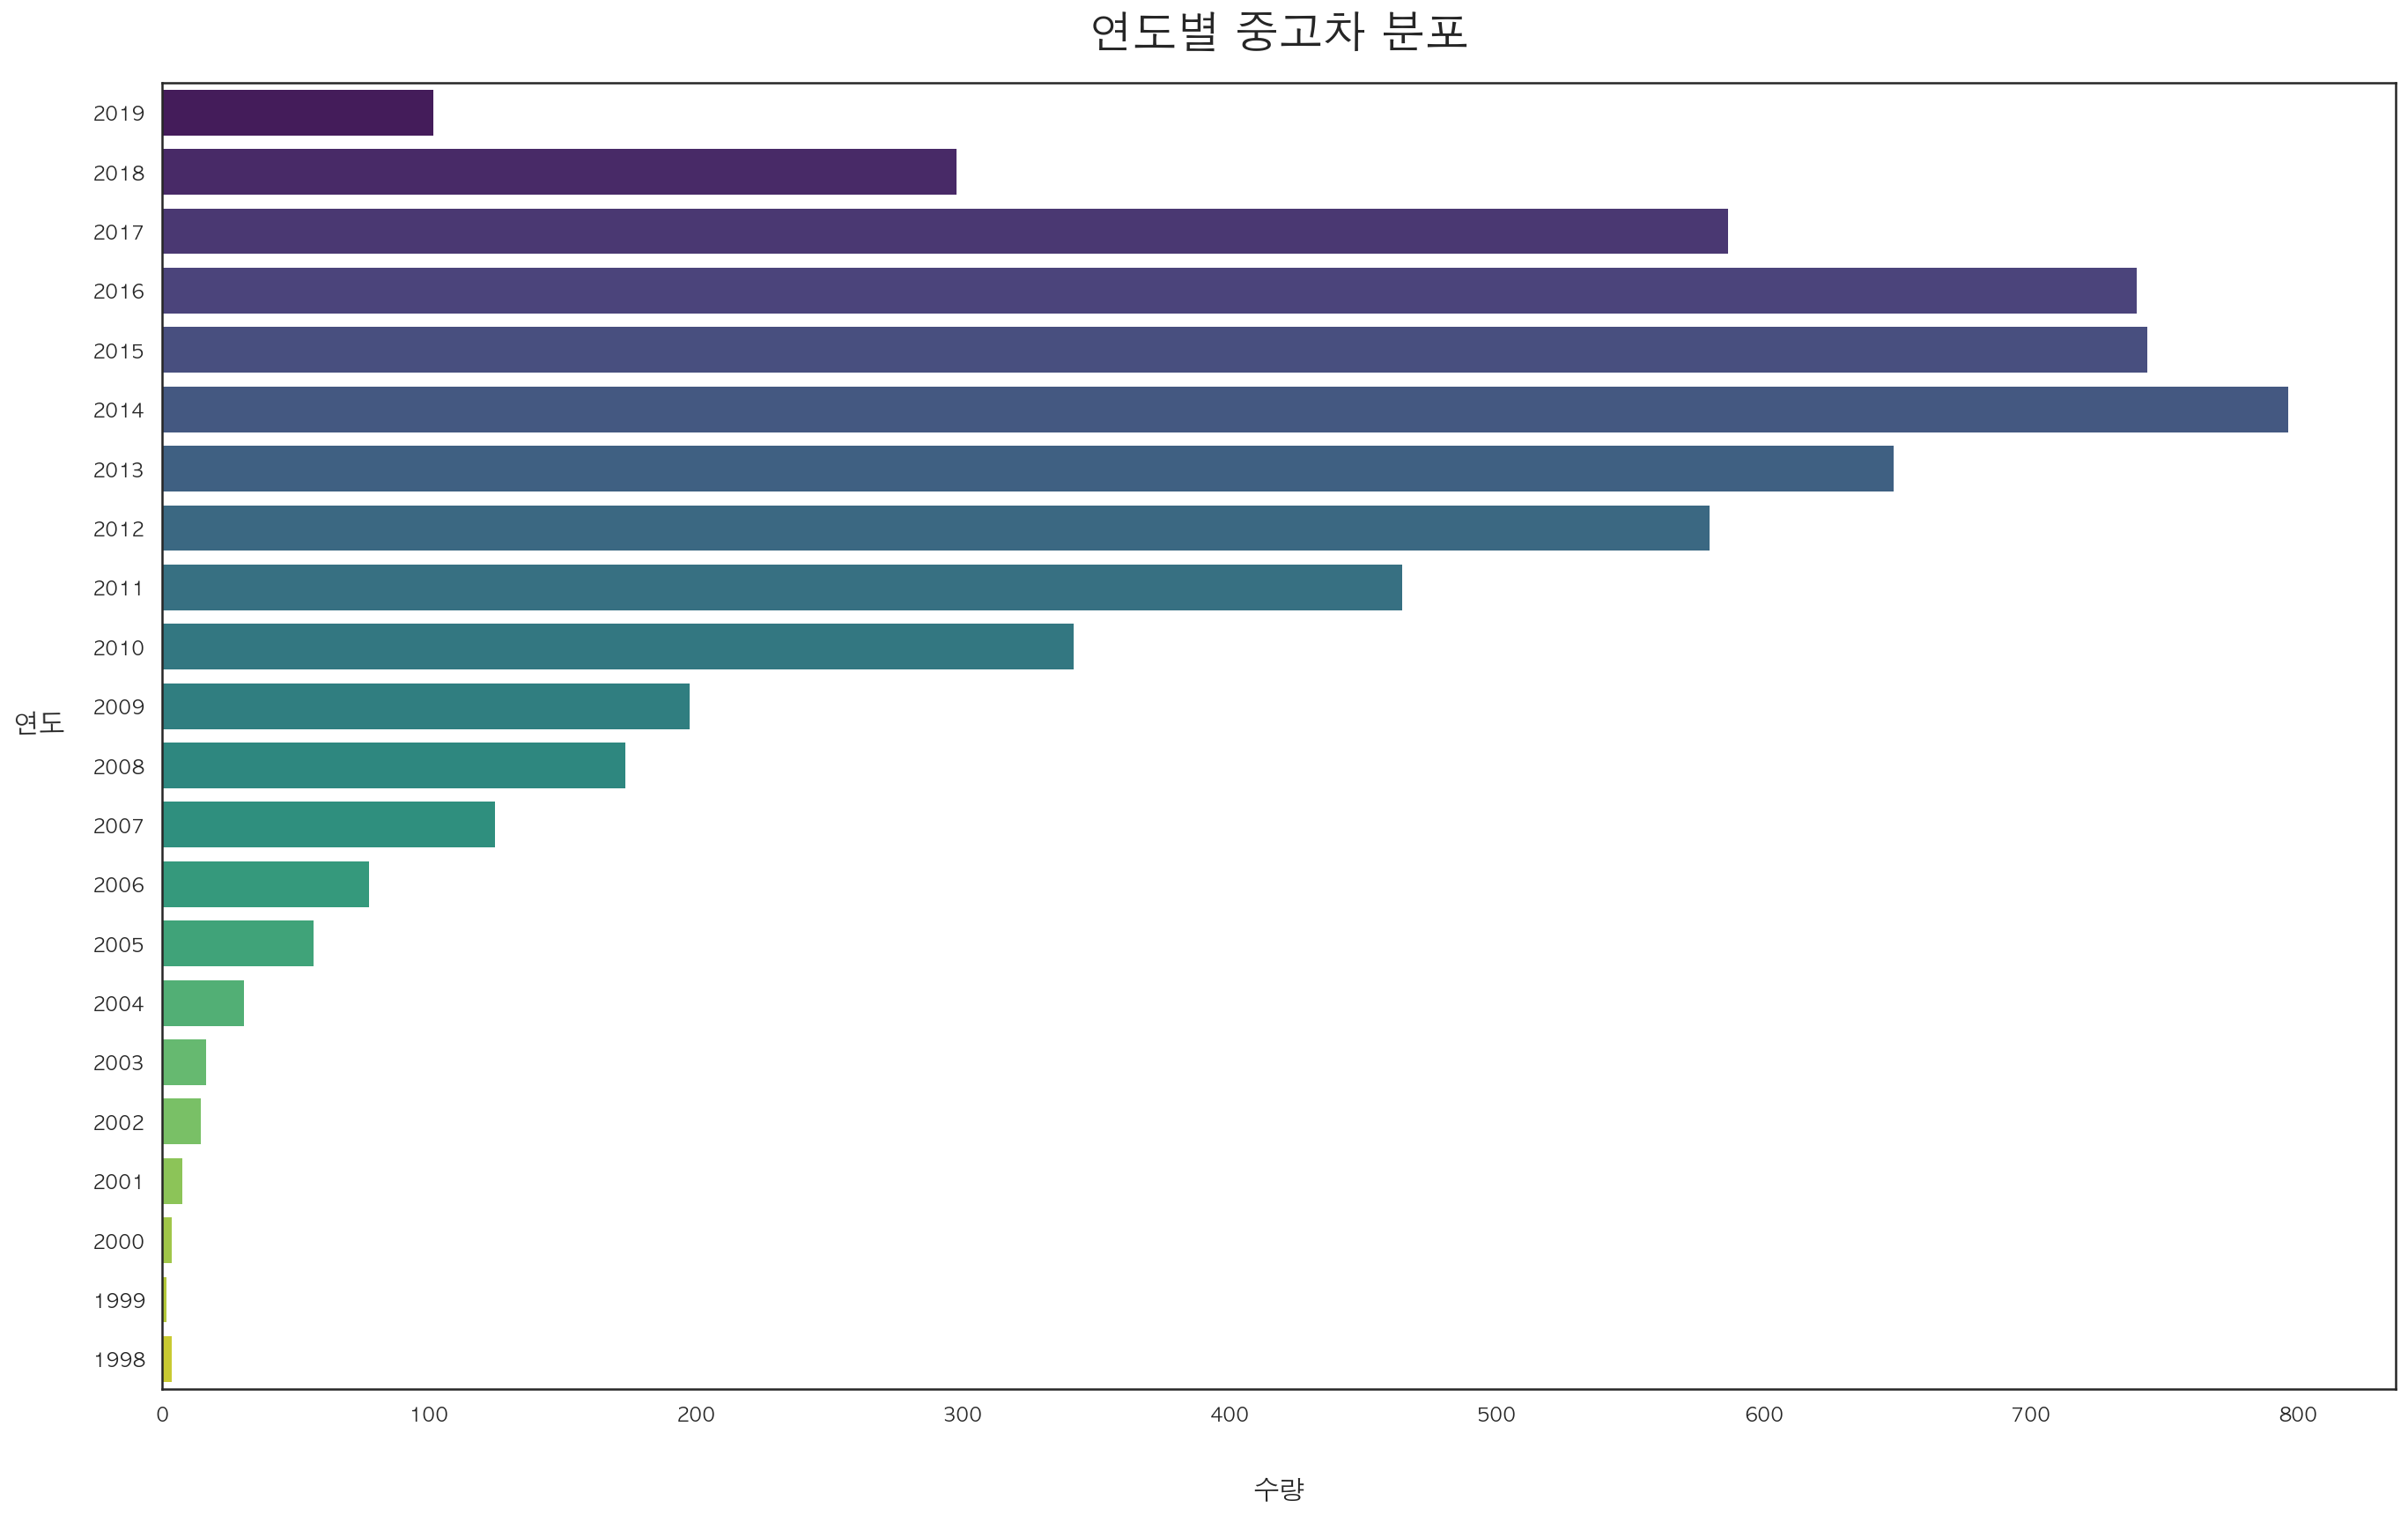

In [96]:
# 연도별 분포 그래프 
%matplotlib inline
plt.figure(figsize=(50, 30))     
plt.subplot(221)  

sns.barplot(data=pd.DataFrame(car_t['Year'].value_counts()).sort_index(ascending=False).T,
           palette='viridis', ci=False, orient='h')     

plt.title('연도별 중고차 분포', fontsize=25, y=1.02)       
plt.xlabel('수량', fontsize=15, labelpad=30)                         
plt.ylabel('연도', fontsize=15, rotation=1, labelpad=30)  

plt.show()

- 연도별로 2014년 -> 2015년 -> 2016년도 순으로 거래가 많았음. (가장 적은 수는 1999년)

#### 3) 지역 

In [18]:
# 지역별 분포표
pd.DataFrame(car_t['Location'].value_counts()).sort_values(by='Location', ascending=False) # 내림차순으로 정렬

Location
Mumbai           789
Hyderabad        742
Kochi            651
Coimbatore       636
Pune             622
Delhi            554
Kolkata          535
Chennai          493
Jaipur           413
Bangalore        358
Ahmedabad        224

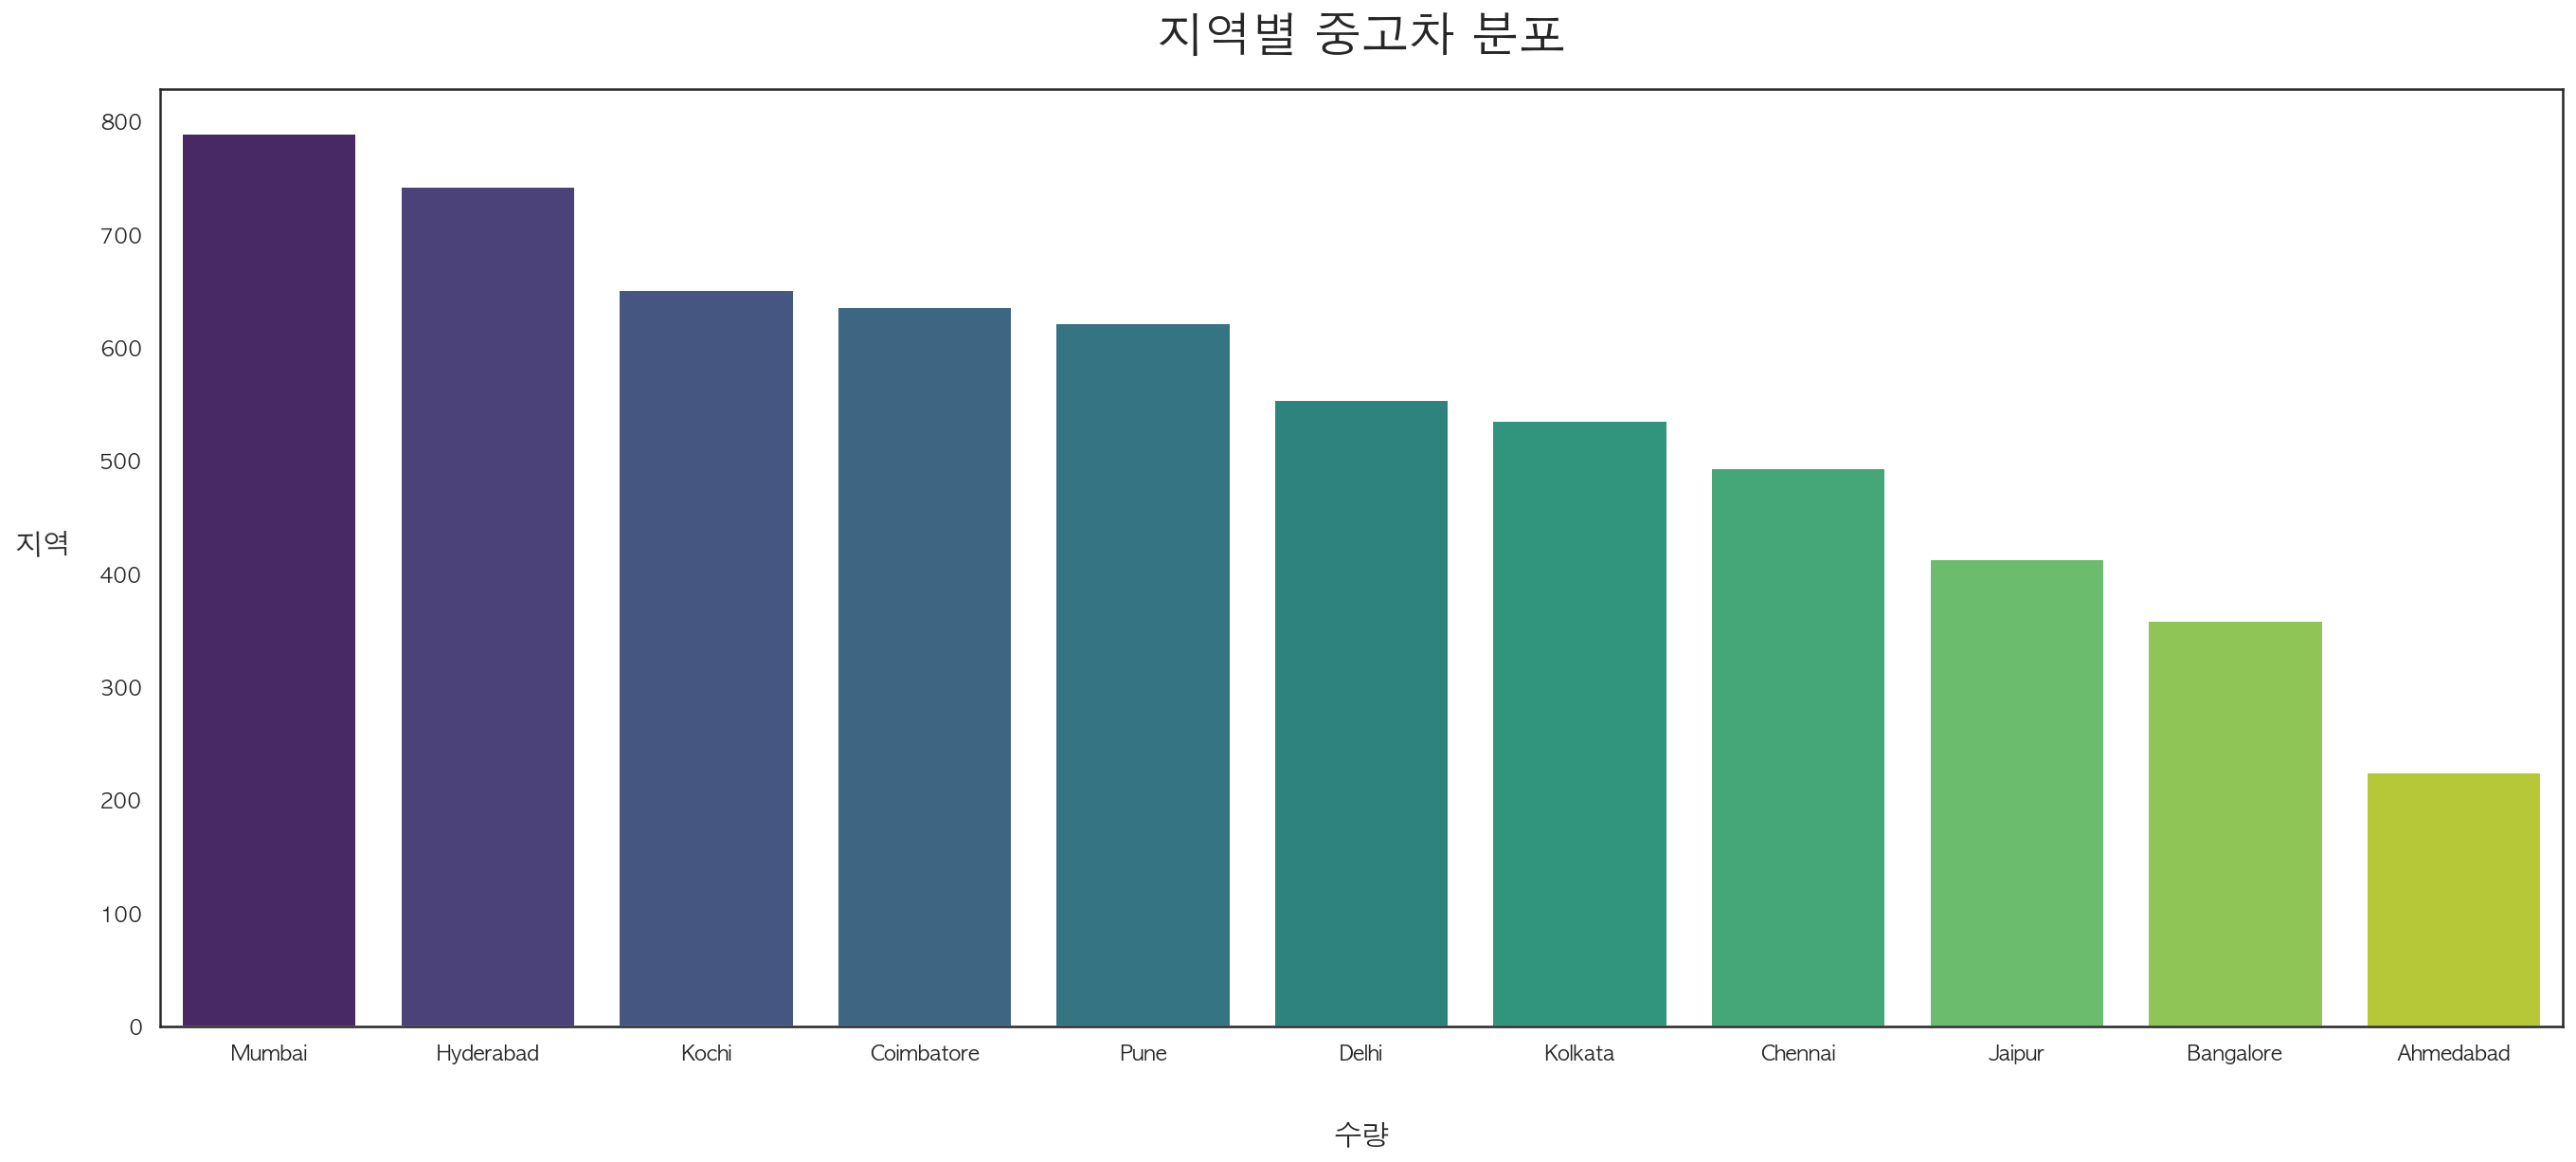

In [19]:
# 지역별 분포 그래프 (일반 막대 그래프)
%matplotlib inline
plt.figure(figsize=(50, 20))     
plt.subplot(221)  

sns.barplot(data=pd.DataFrame(car_t['Location'].value_counts()).sort_values(by='Location', ascending=False).T,
           palette='viridis', ci=False)     

plt.title('지역별 중고차 분포', fontsize=25, y=1.03)       
plt.xlabel('수량', fontsize=15, labelpad=30)                         
plt.ylabel('지역', fontsize=15, rotation=1, labelpad=30)  

plt.show()

- 지역별로는 Mumbai -> Hyderabad -> Kochi 순으로 거래가 활발했음.

#### 4) 변속기

In [20]:
pd.DataFrame(car_t['Transmission'].value_counts()).sort_index(ascending=False)

Transmission
Manual             4299
Automatic          1718

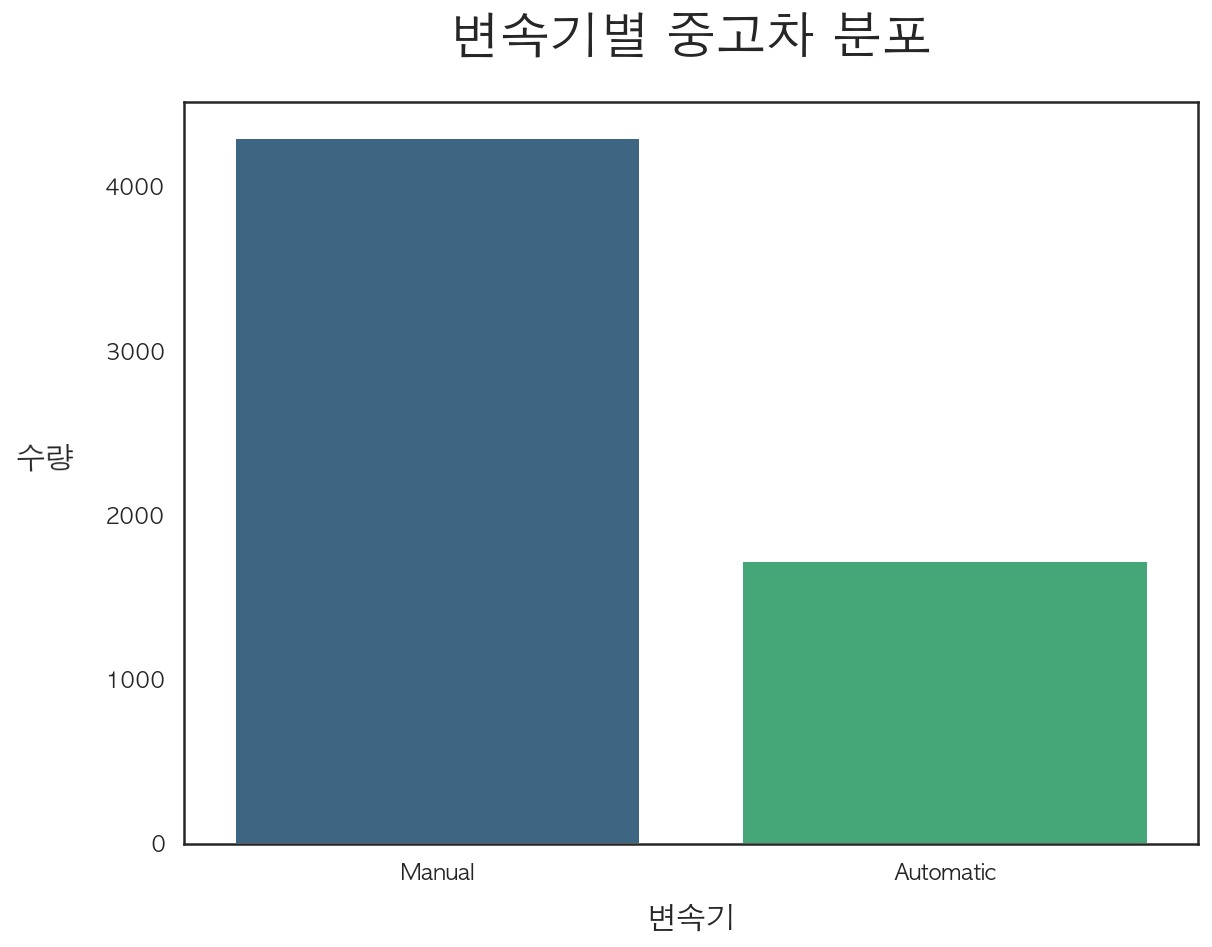

In [21]:
# 변속기별 분포 그래프 (일반 막대 그래프)
%matplotlib inline
plt.figure(figsize=(20, 15))     
plt.subplot(221)  

sns.barplot(data=pd.DataFrame(car_t['Transmission'].value_counts()).sort_index(ascending=False).T,
           palette='viridis', ci=False)     

plt.title('변속기별 중고차 분포', fontsize=25, y=1.05)       
plt.xlabel('변속기', fontsize=15, labelpad=10)                         
plt.ylabel('수량', fontsize=15, rotation=1, labelpad=30)  

plt.show()

- 변속기별로 보았을 때 수동 변속기의 판매가 많이 이루어졌음.

#### 5) Owner Type

In [22]:
pd.DataFrame(car_t['Owner_Type'].value_counts()).sort_values(by='Owner_Type', ascending=False)

Owner_Type
First                 4927
Second                 968
Third                  113
Fourth & Above           9

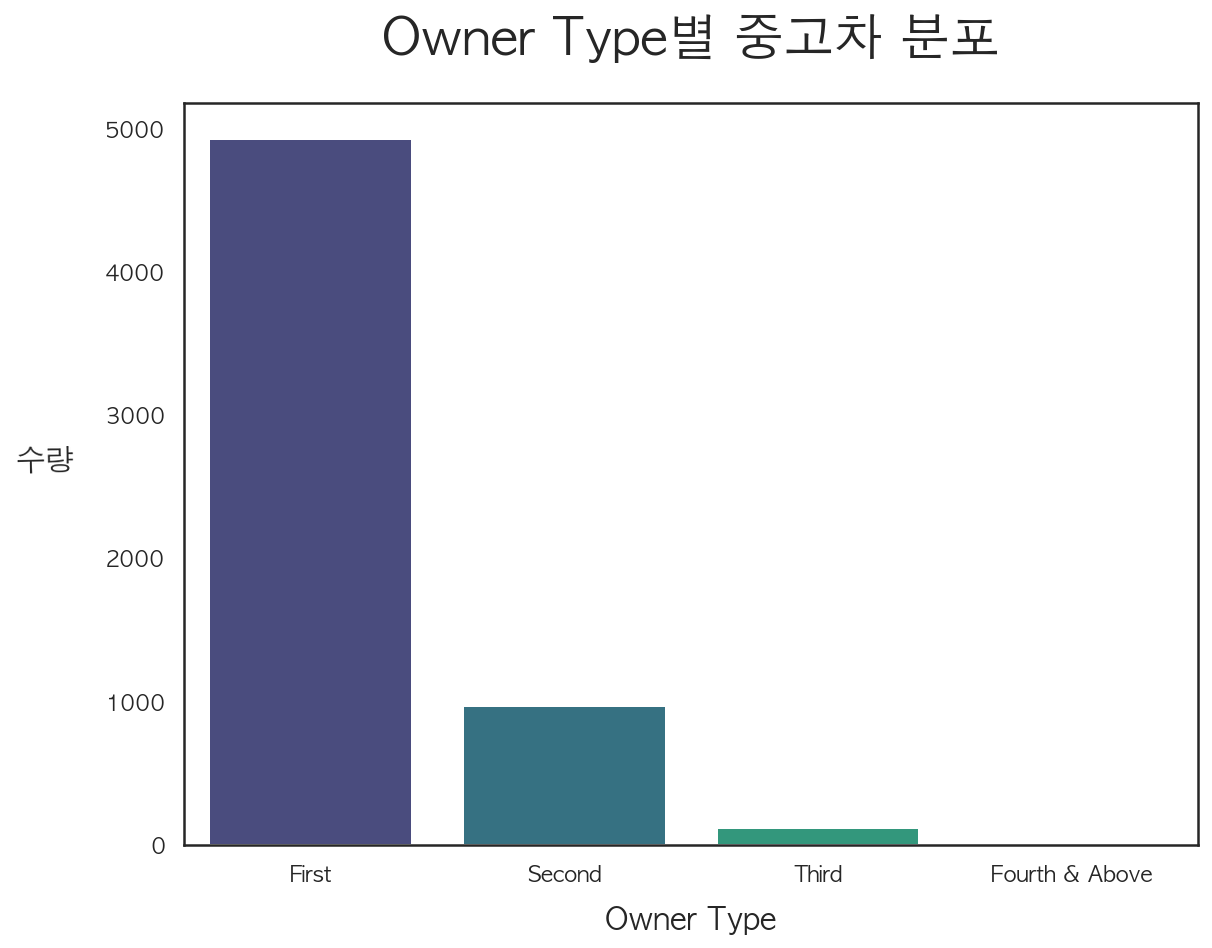

In [23]:
# Owner Type별 분포 그래프 (일반 막대그래프)
%matplotlib inline
plt.figure(figsize=(20, 15))     
plt.subplot(221)  

sns.barplot(data=pd.DataFrame(car_t['Owner_Type'].value_counts()).sort_values(by='Owner_Type', ascending=False).T,
           palette='viridis', ci=False)     

plt.title('Owner Type별 중고차 분포', fontsize=25, y=1.05)       
plt.xlabel('Owner Type', fontsize=15, labelpad=10)                         
plt.ylabel('수량', fontsize=15, rotation=1, labelpad=30)  

plt.show()

- Owner Type은 첫 거래로 하는 사람들이 많음.

#### 6) 연료

In [24]:
# 연료 분포 표
pd.DataFrame(car_t['Fuel_Type'].value_counts())

Fuel_Type
Diesel       3205
Petrol       2746
CNG            56
LPG            10

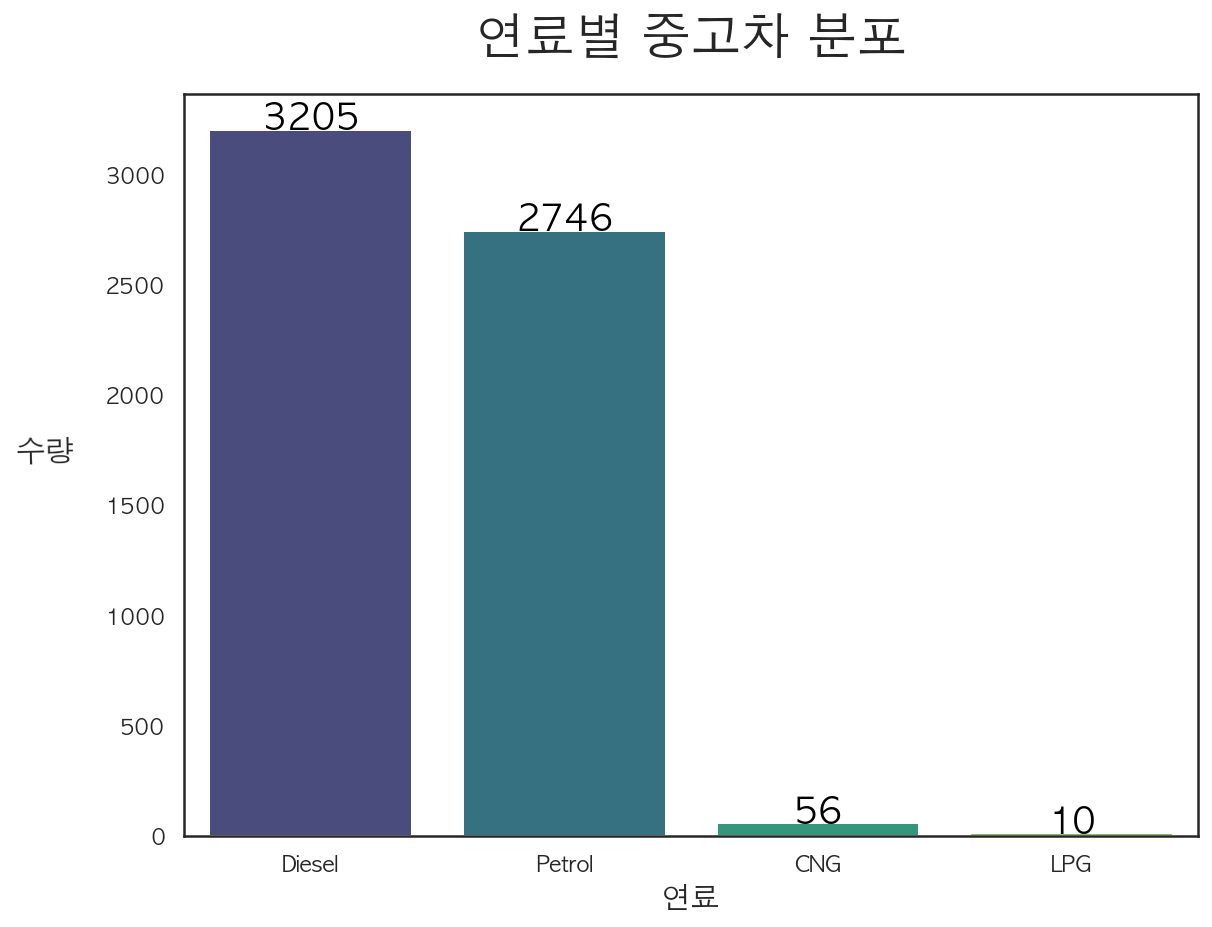

In [25]:
# Fuel Type별 분포 그래프 (일반 막대 그래프)
%matplotlib inline
plt.figure(figsize=(20, 15))     
plt.subplot(221)  

g = sns.barplot(data=pd.DataFrame(car_t['Fuel_Type'].value_counts()).T,
           palette='viridis', ci=False)     

plt.title('연료별 중고차 분포', fontsize=25, y=1.04)       
plt.xlabel('연료', fontsize=15)                         
plt.ylabel('수량', fontsize=15, rotation=1, labelpad=30)  

for i in range(0, 4):
    g.text(i, car_t['Fuel_Type'].value_counts()[i], car_t['Fuel_Type'].value_counts()[i],
          color = 'black', ha='center', fontsize=18)

plt.show()

In [26]:
# 각 Fuel_type을 km/L로 계산
# CNP(수소) km/kg -> km/L 단위로 변경 (n * 1.64)
# LPG(가스) km/kg -> km/L 단위로 변경 (n * 1.3)
car_t['Mile'][car_t['Fuel_Type'] == 'CNG'] = car_t[car_t['Fuel_Type'] == 'CNG']['Mile']*1.64
car_t['Mile'][car_t['Fuel_Type'] == 'LPG'] = car_t[car_t['Fuel_Type'] == 'LPG']['Mile']*1.3

#### 7) 전처리  한번더 
- dummy 생성

In [27]:
# dummy 생성
dummy_col = ['Brand', 'Fuel_Type', 'Transmission']

for i in dummy_col:
    dummy = pd.get_dummies(car_t[i])
    car_t = pd.concat([car_t, dummy], axis=1)
    print(i)

Brand
Fuel_Type
Transmission


In [28]:
# Owner를 1234로 변환
car_t['Owner'] = range(0,len(car_t))

for i in range(0,len(car_t)):
    if car_t['Owner_Type'][i] == 'First':
        car_t['Owner'][i] = 1

    elif car_t['Owner_Type'][i] == 'Second':
        car_t['Owner'][i] = 2

    elif car_t['Owner_Type'][i] == 'Third':
        car_t['Owner'][i] = 3

    elif car_t['Owner_Type'][i] == 'Fourth & Above':
        car_t['Owner'][i] = 4

In [29]:
# dummy 생성후 중복 컬럼 제거
car_t.drop(['Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power'], axis=1, inplace=True)

### 1-2. 시각화 
- 히트맵 & regplot

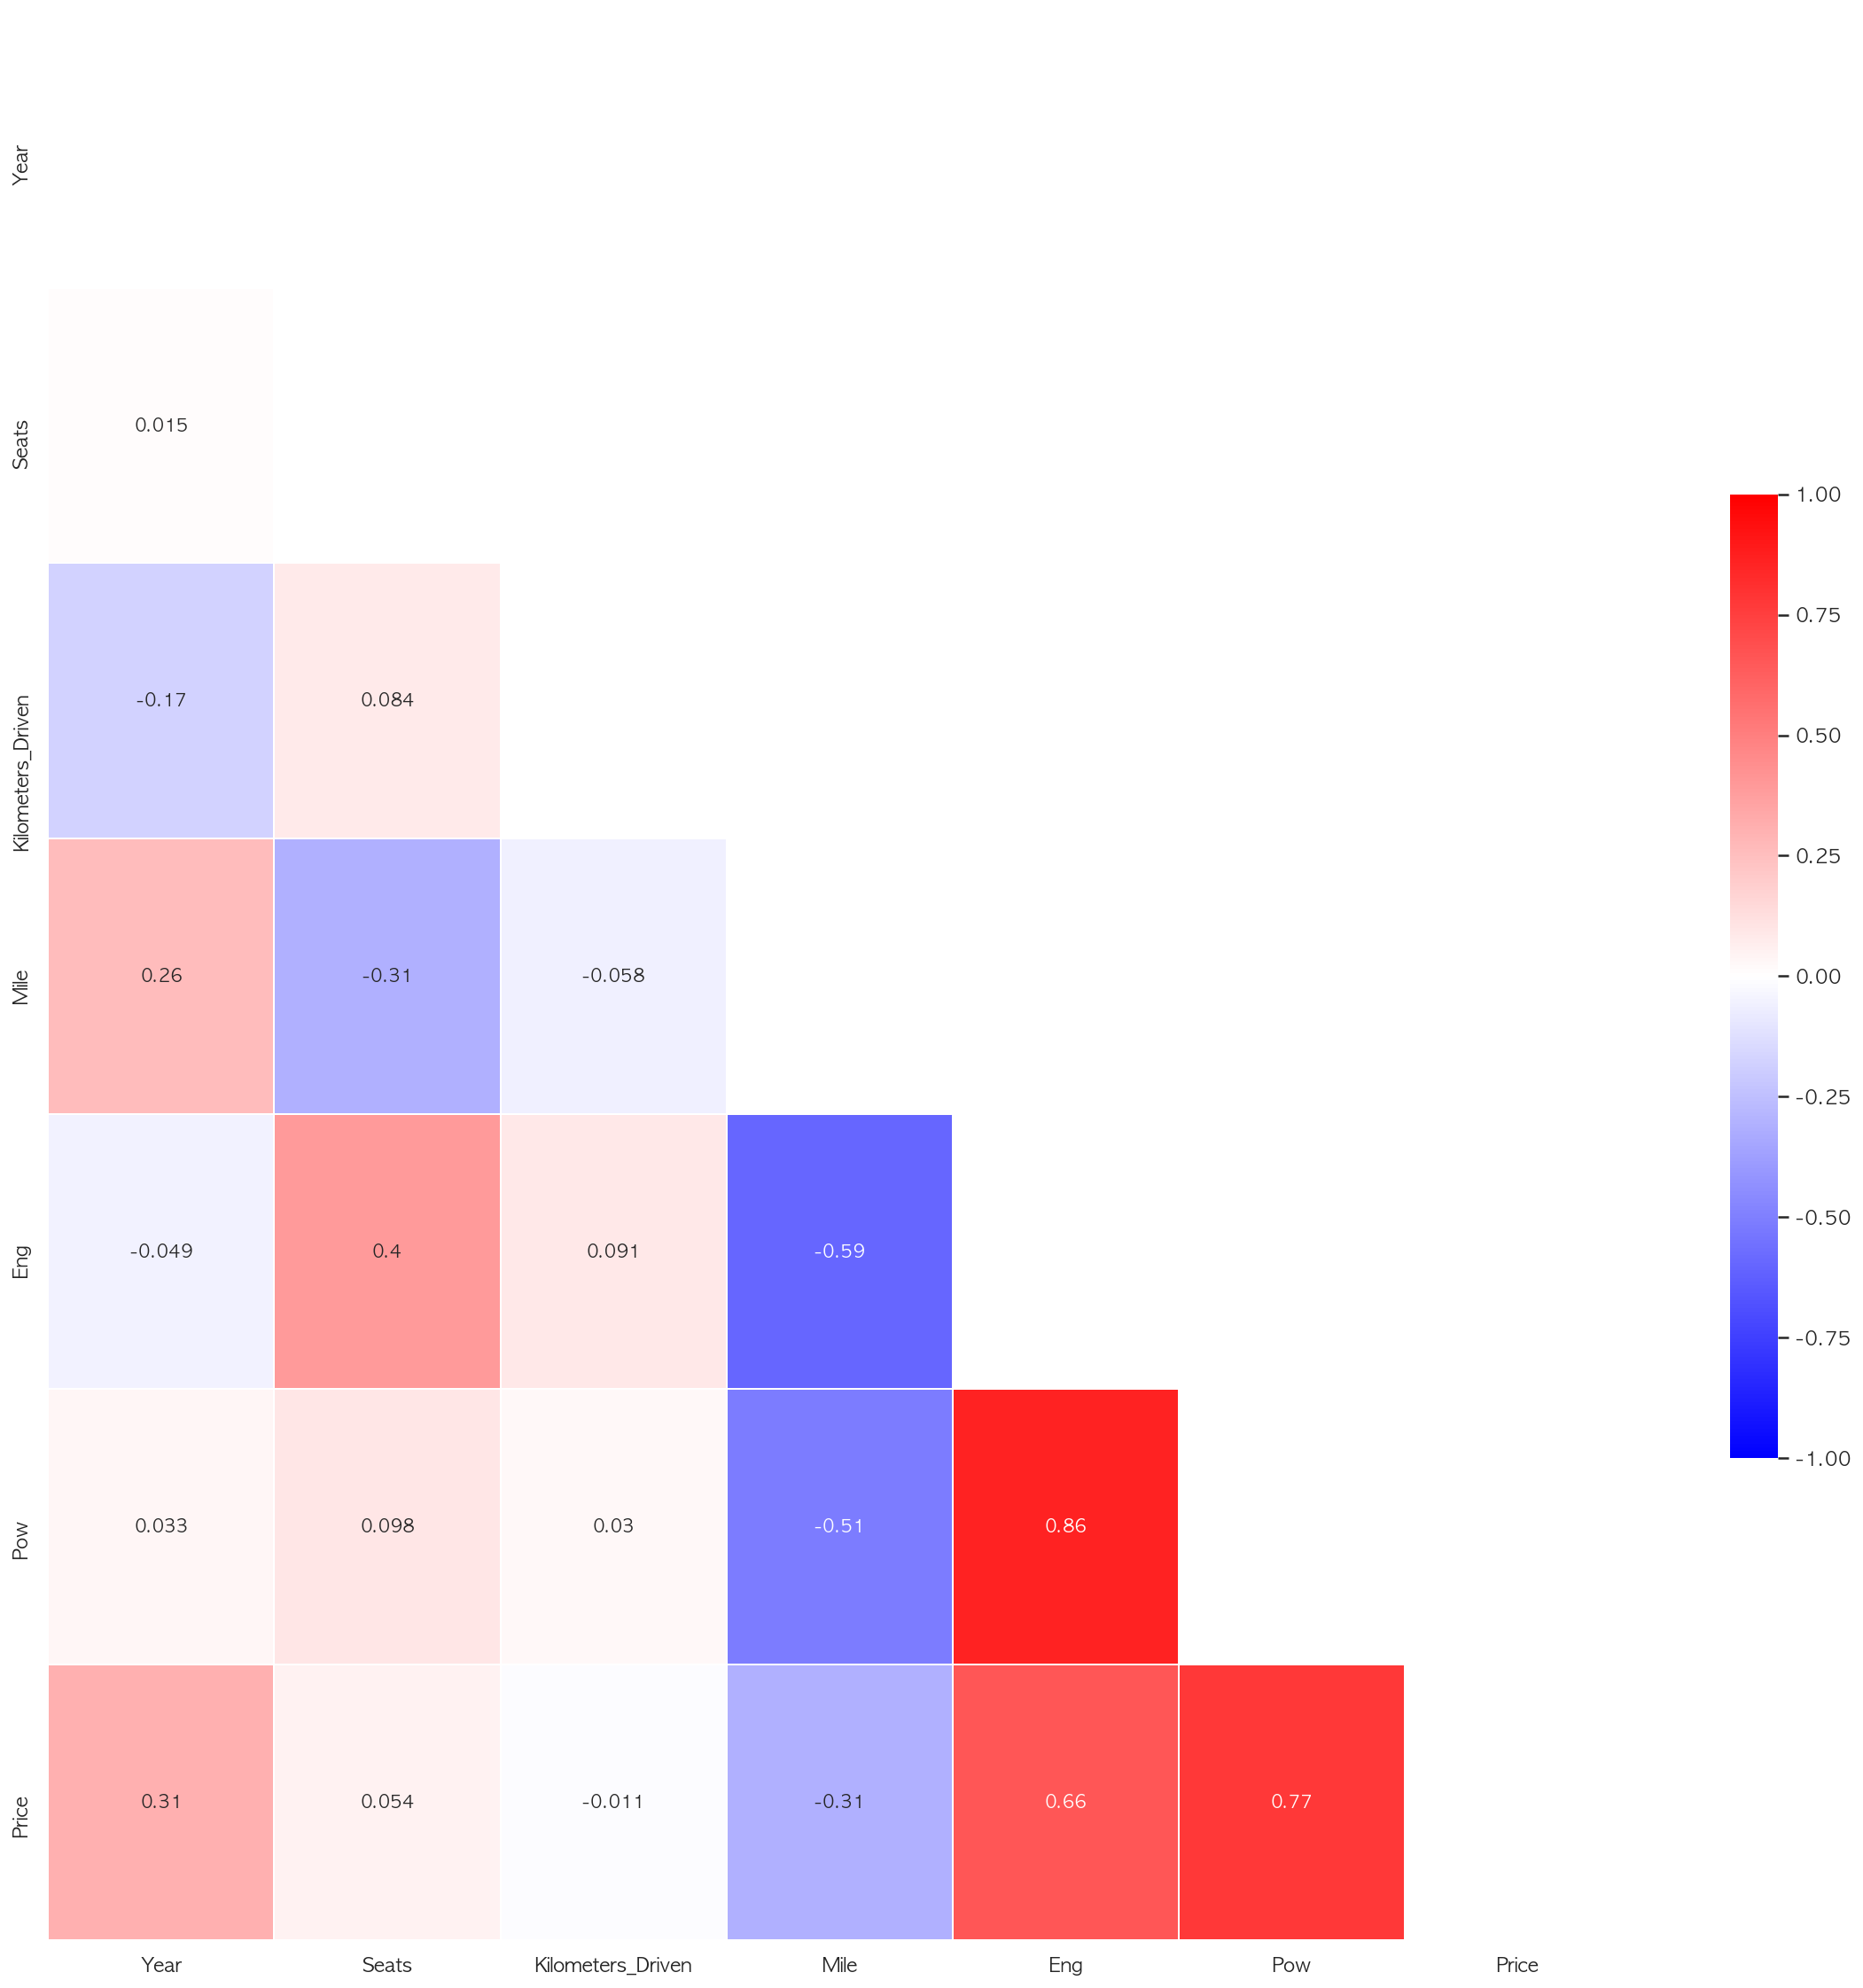

In [30]:
# 주요 변수들로 히트맵
df = car_t[['Year', 'Seats', 'Kilometers_Driven', 'Mile', 'Eng', 'Pow', 'Price']].corr()

# 그림 사이즈 지정
fig, ax = plt.subplots(figsize=(20,20))

# 삼각형 마스크를 만든다 (위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않으 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기 
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1    #  컬러바 범위 -1 ~ 1
           )  
plt.show()

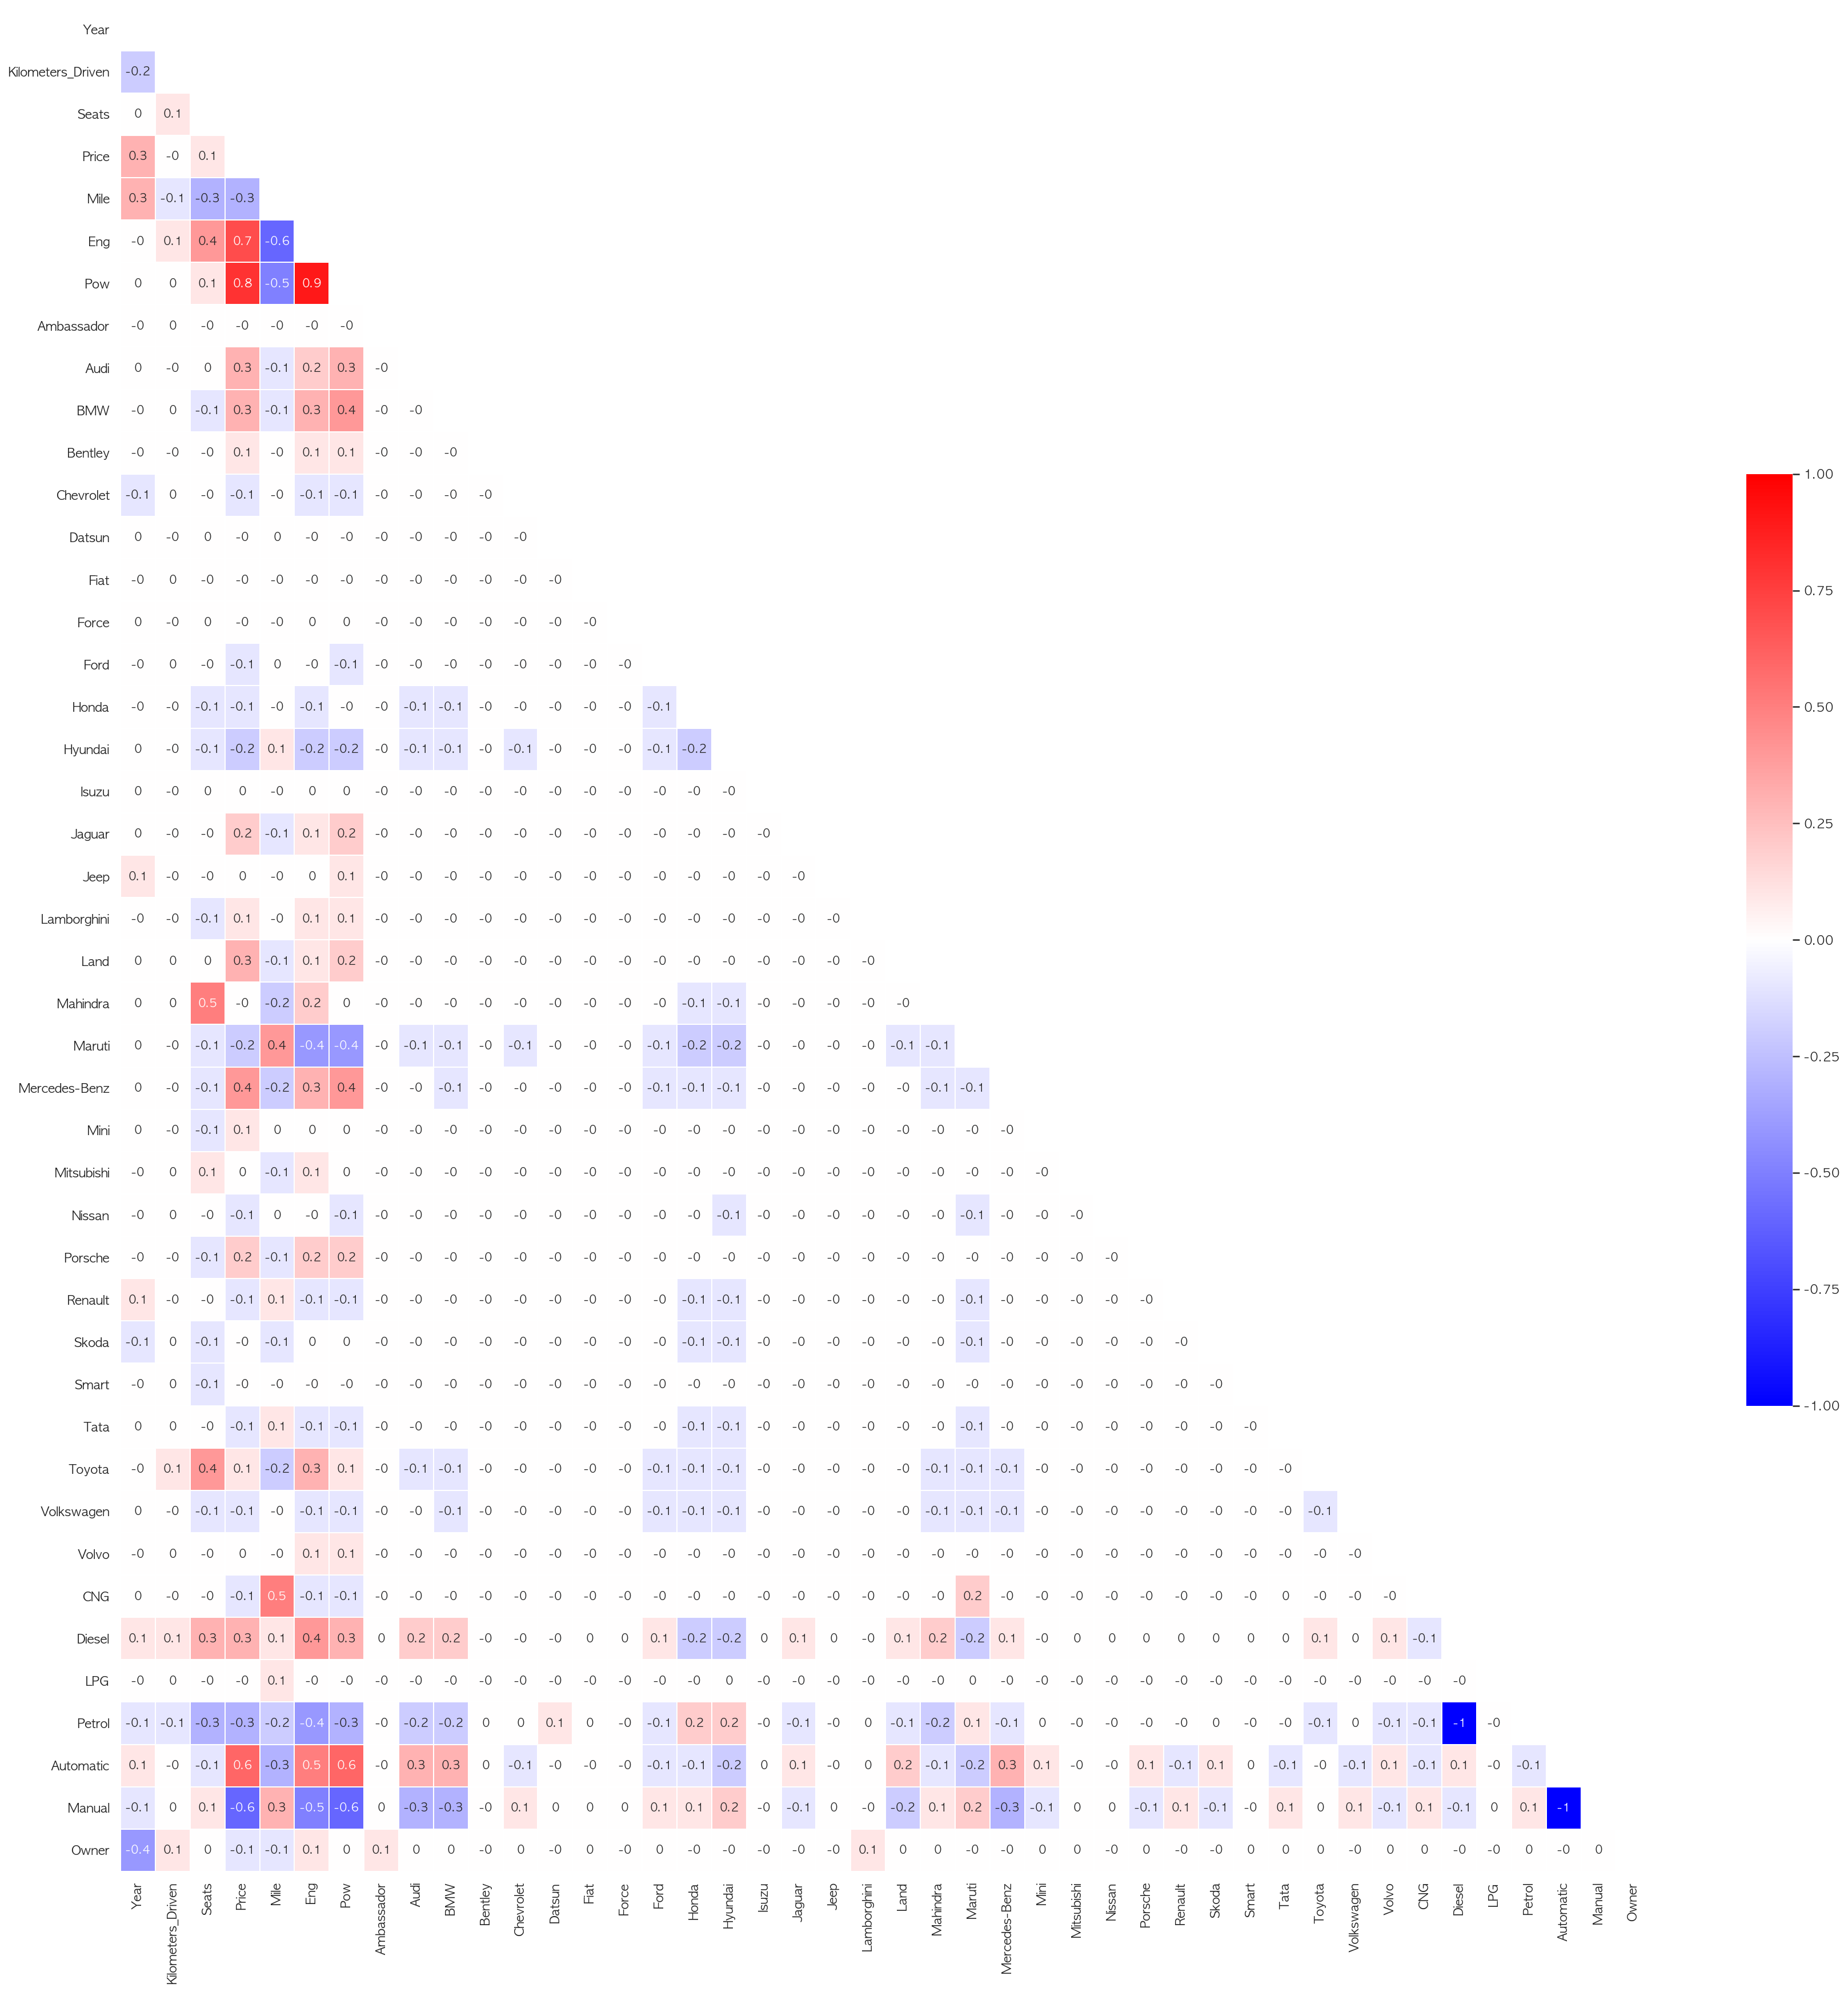

In [31]:
# 모든 컬럼을 변수로 히트맵
df = car_t.corr().round(1)

fig, ax = plt.subplots(figsize=(30,30))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

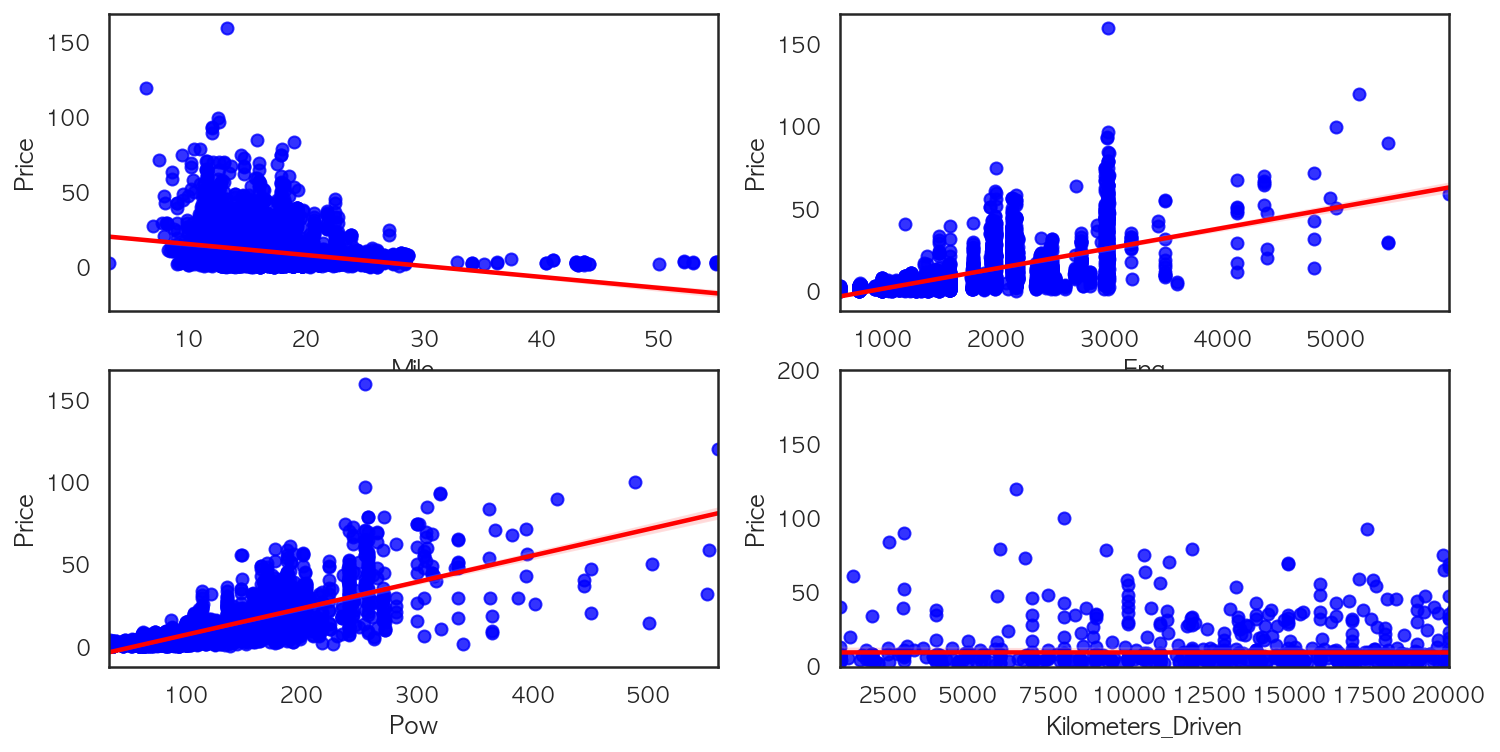

In [32]:
# 주요변수로 regplot
plt.figure(figsize=(12,6))

plt.subplot(221)
sns.regplot(x="Mile", y="Price",
                data=car_t, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(222)
sns.regplot(x="Eng", y="Price",
                data=car_t, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(223)
sns.regplot(x="Pow", y="Price",
                data=car_t, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(224)
sns.regplot(x="Kilometers_Driven", y="Price",
                data=car_t, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.axis([1000, 20000, 0, 200])
plt.show()

- 가격과 상관관계가 있는 것은 제동마력과 엔진!

### 1-3.  New price가 포함된 데이터 전 처리
- 전처리
- Regplot 그리기 

In [33]:
# new_price가 있는 데이터 전처리

car_td = car_t.dropna()

car_td.reset_index(drop=True, inplace=True)

get_split(car_td, 'New_Price', 'new_price')

car_td['new_price'] = car_td['new_price'].astype(float)

new_price


<AxesSubplot:xlabel='new_price', ylabel='Price'>

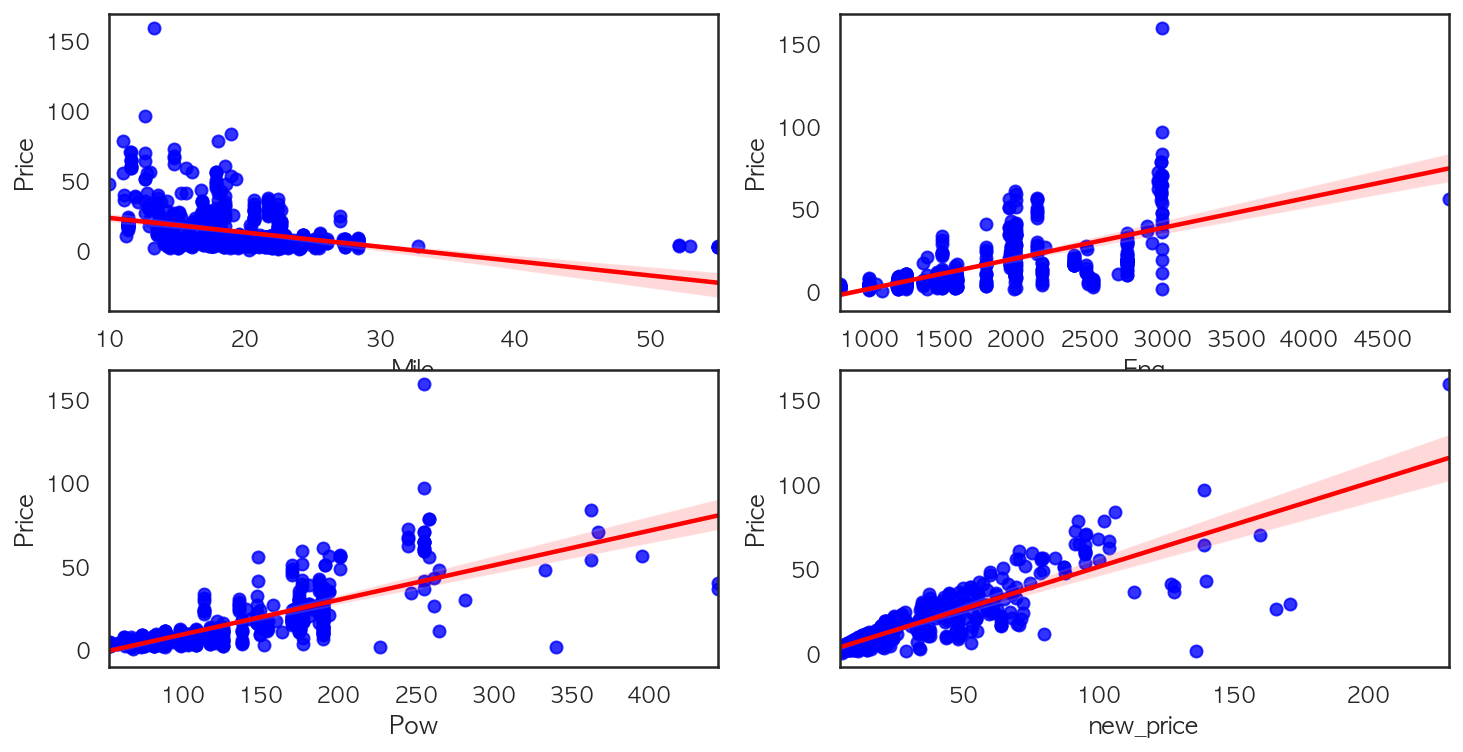

In [34]:
# new_price가 있는 데이터 regplot

plt.figure(figsize=(12,6))
plt.axis([50, 500, 0, 200])

plt.subplot(221)
sns.regplot(x="Mile", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(222)
sns.regplot(x="Eng", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(223)
sns.regplot(x="Pow", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(224)
sns.regplot(x="new_price", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

- New_price(신차가격)이 포함된 것을 바탕으로 그려보니 엔진, 마력, 심지어 중고차 가격과 상관관계가 있음이 나타남

## 2. 모델 및 데이터 탐색

In [35]:
# linear 모델 결과 확인
def get_results(x, y):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)
    # train set = 80%, test set = 20% 비율로 13개의 랜덤한 수로 추출

    reg = LinearRegression()    # LinearRegression을 사용
    reg.fit(x_train, y_train)

    pred_test = reg.predict(x_test)

    print('explained_variance_score: {}'.format(explained_variance_score(pred_test, y_test)))
    print('mean_squared_errors: {}'.format(mean_squared_error(pred_test, y_test)))
    print('r2_score: {}'.format(r2_score(pred_test, y_test)))

### 2-1. new_price가 있는 데이터 823개
- New_price(신차값)가 있는 데이터 823개, 커럼 51개 데이터

In [36]:
x = car_td.drop(['Name','Location','New_Price','Brand','Car_name', 'Price'], axis=1)
y = car_td['Price']

get_results(x, y)

explained_variance_score: 0.7273686034338462
mean_squared_errors: 46.35748393233978
r2_score: 0.7256936237219009


### 2-2. new_price 컬럼 제거, 6017개
- New_price(신차값)를 drop한 6017개, 컬럼 50개 데이터 

In [37]:
x = car_t.drop(['Name','Location','New_Price','Brand','Car_name', 'Price'], axis=1)
y = car_t['Price']

get_results(x, y)

explained_variance_score: 0.6851230586401246
mean_squared_errors: 29.77504181468212
r2_score: 0.6840608572493747


### 2-3. raw 데이터, new_price가 있는 데이터 823개
- raw 데이터, New_price notnull 값 823개, 컬럼 14개

In [38]:
# 전처리
car_tr.dropna(inplace=True)
car_tr.reset_index(drop=True, inplace=True)

get_split(car_tr, 'Mileage', 'Mile')
get_split(car_tr, 'Engine', 'Eng')
get_split(car_tr, 'Power', 'Pow')
get_split(car_tr, 'New_Price', 'new_price')

Mile
Eng
Pow
new_price


In [39]:
car_tr.head()

Unnamed: 0                               Name Location  Year  \
0           2                       Honda Jazz V  Chennai  2011   
1           7  Toyota Innova Crysta 2.8 GX AT 8S   Mumbai  2016   
2          10                   Maruti Ciaz Zeta    Kochi  2018   
3          15        Mitsubishi Pajero Sport 4X4    Delhi  2014   
4          20                  BMW 3 Series 320d    Kochi  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
1              36000    Diesel    Automatic      First  11.36 kmpl  2755 CC   
2              25692    Petrol       Manual      First  21.56 kmpl  1462 CC   
3             110000    Diesel       Manual      First   13.5 kmpl  2477 CC   
4              32982    Diesel    Automatic      First  22.69 kmpl  1995 CC   

        Power  Seats   New_Price  Price   Mile   Eng     Pow new_price  
0    88.7 bhp    5.0   8.61 Lakh   4.50   18.2  1199    88.7      8.61  
1   171.5 bhp    8.0     21 Lakh  17.50  11.36  2755   171.5        21  
2  103.25 bhp    5.0  10.65 Lakh   9.95  21.56  1462  103.25     10.65  
3  175.56 bhp    7.0  32.01 Lakh  15.00   13.5  2477  175.56     32.01  
4     190 bhp    5.0  47.87 Lakh  18.55  22.69  1995     190     47.87

In [40]:
car_td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               823 non-null    object 
 1   Location           823 non-null    object 
 2   Year               823 non-null    int64  
 3   Kilometers_Driven  823 non-null    int64  
 4   Seats              823 non-null    int64  
 5   New_Price          823 non-null    object 
 6   Price              823 non-null    float64
 7   Brand              823 non-null    object 
 8   Car_name           823 non-null    object 
 9   Mile               823 non-null    float64
 10  Eng                823 non-null    float64
 11  Pow                823 non-null    float64
 12  Ambassador         823 non-null    uint8  
 13  Audi               823 non-null    uint8  
 14  BMW                823 non-null    uint8  
 15  Bentley            823 non-null    uint8  
 16  Chevrolet          823 non

In [41]:
# raw 데이터, new_price notnull값 823개, 컬럼 14개

x = car_tr.drop(['Unnamed: 0','Name','Location','Fuel_Type','Transmission','New_Price',
                 'Owner_Type','Mileage','Engine','Power','Price'], axis=1)
y = car_tr['Price']

get_results(x, y)

explained_variance_score: 0.6518194945588615
mean_squared_errors: 62.231835047080146
r2_score: 0.6436665111804899


### 2-4. 지역 dummy

In [42]:
dummy = pd.get_dummies(car_t['Location'])   # Location(판매 지역)을 dummy시켜 줌.
car_t_l = pd.concat([car_t, dummy], axis=1)  # 그리고 합침.

In [43]:
x = car_t_l.drop(['Name', 'Location', 'New_Price', 'Brand', 'Car_name', 'Price'], axis=1)
y = car_t_l['Price']

get_results(x, y)

explained_variance_score: 0.7042040951111461
mean_squared_errors: 28.57543594160681
r2_score: 0.702808708297521


### 2-5. 컬럼끼리 상관관계가 높은 컬럼 제거

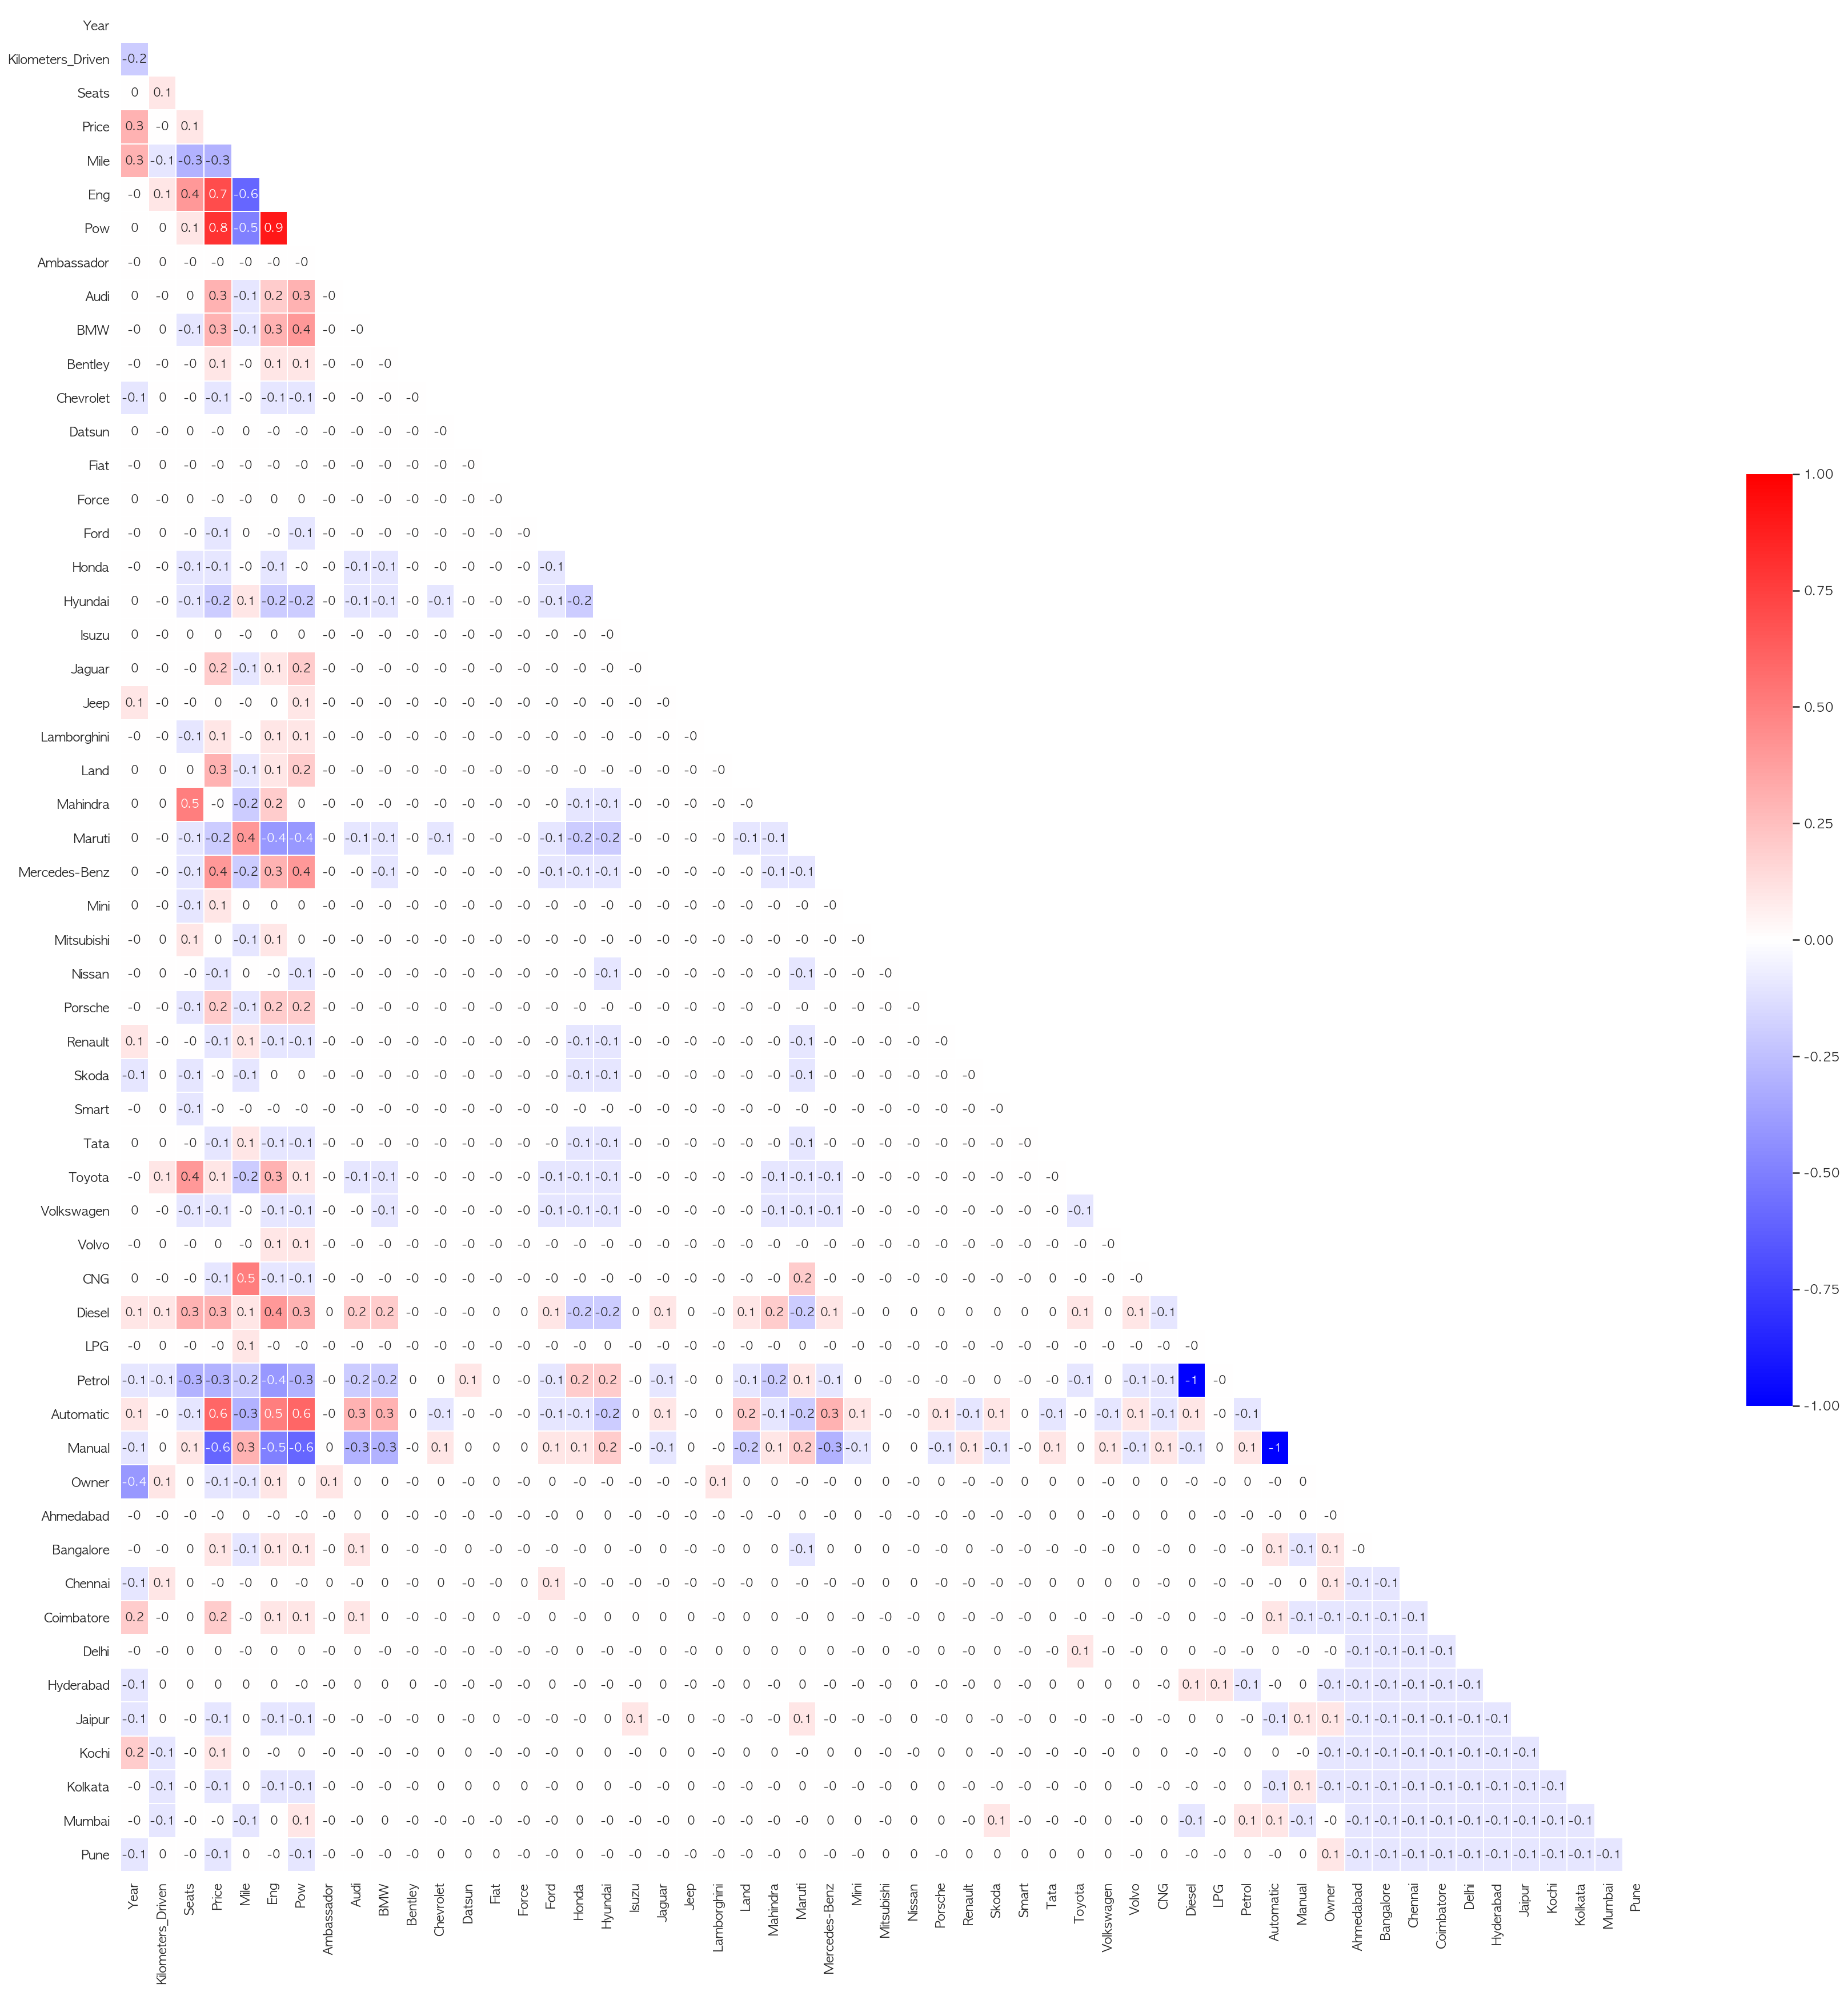

In [44]:
df = car_t_l.corr().round(1)

flg, ax = plt.subplots(figsize=(30,30))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df,
           cmap='bwr',
           annot=True,
           mask=mask,
           linewidths=.5,
           cbar_kws={"shrink": .5},
           vmin=-1, vmax=1
           )
plt.show()

In [45]:
# 엔진을 빼는것이 더 성능을 높임.
x = car_t_l.drop(['Name', 'Location', 'New_Price', 'Brand', 'Car_name', 'Price', 'Eng'], axis=1)
y = car_t_l['Price']

get_results(x, y)

explained_variance_score: 0.7069171710901134
mean_squared_errors: 28.345742980595187
r2_score: 0.7056570405919307


In [46]:
# pow도 빼보았지만 엔진을 빼는 것 보다 성능이 좋지 못함.
x = car_t_l.drop(['Name', 'Location', 'New_Price', 'Brand', 'Car_name', 'Price', 'Pow'], axis=1)
y = car_t_l['Price']

get_results(x, y)

explained_variance_score: 0.6656389819570088
mean_squared_errors: 31.720053720030354
r2_score: 0.6640995942257829


### 2-6. 이상치 제거

In [47]:
car_t_l.head(1)

Name Location  Year  Kilometers_Driven  Seats New_Price  \
0  Maruti Wagon R LXI CNG   Mumbai  2010              72000      5       NaN   

   Price   Brand         Car_name    Mile    Eng    Pow  Ambassador  Audi  \
0   1.75  Maruti  Wagon R LXI CNG  43.624  998.0  58.16           0     0   

   BMW  Bentley  Chevrolet  Datsun  Fiat  Force  Ford  Honda  Hyundai  Isuzu  \
0    0        0          0       0     0      0     0      0        0      0   

   Jaguar  Jeep  Lamborghini  Land  Mahindra  Maruti  Mercedes-Benz  Mini  \
0       0     0            0     0         0       1              0     0   

   Mitsubishi  Nissan  Porsche  Renault  Skoda  Smart  Tata  Toyota  \
0           0       0        0        0      0      0     0       0   

   Volkswagen  Volvo  CNG  Diesel  LPG  Petrol  Automatic  Manual  Owner  \
0           0      0    1       0    0       0          0       1      1   

   Ahmedabad  Bangalore  Chennai  Coimbatore  Delhi  Hyderabad  Jaipur  Kochi  \
0          0          0        0           0      0          0       0      0   

   Kolkata  Mumbai  Pune  
0        0       1     0

In [48]:
# 주행거리 기준으로 내림차순으로 정렬 
car_t_l.sort_values(by='Kilometers_Driven', ascending=False).head(10)

Name   Location  Year  \
2328                        BMW X5 xDrive 30d M Sport    Chennai  2017   
340            Skoda Octavia Ambition Plus 2.0 TDI AT    Kolkata  2013   
1860                 Volkswagen Vento Diesel Highline    Chennai  2013   
358                             Hyundai i10 Magna 1.2    Chennai  2009   
3092                             Honda City i VTEC SV    Kolkata  2015   
2823  Volkswagen Jetta 2013-2015 2.0L TDI Highline AT    Chennai  2015   
4490                   Hyundai i20 Magna Optional 1.2  Bangalore  2013   
3649                                   Tata Indigo LS     Jaipur  2008   
1528      Toyota Innova 2.5 G (Diesel) 8 Seater BS IV  Hyderabad  2005   
1975                          Skoda Superb 1.8 TSI MT       Pune  2012   

      Kilometers_Driven  Seats New_Price  Price       Brand  \
2328            6500000      5       NaN  65.00         BMW   
340              775000      5       NaN   7.50       Skoda   
1860             720000      5       NaN   5.90  Volkswagen   
358              620000      5       NaN   2.70     Hyundai   
3092             480000      5       NaN   5.00       Honda   
2823             480000      5       NaN  13.00  Volkswagen   
4490             445000      5       NaN   4.45     Hyundai   
3649             300000      5       NaN   1.00        Tata   
1528             299322      8       NaN   4.00      Toyota   
1975             282000      5       NaN   3.30       Skoda   

                                  Car_name   Mile     Eng     Pow  Ambassador  \
2328                 X5 xDrive 30d M Sport  15.97  2993.0  258.00           0   
340       Octavia Ambition Plus 2.0 TDI AT  19.30  1968.0  141.00           0   
1860                 Vento Diesel Highline  20.54  1598.0  103.60           0   
358                          i10 Magna 1.2  20.36  1197.0   78.90           0   
3092                        City i VTEC SV  17.40  1497.0  117.30           0   
2823  Jetta 2013-2015 2.0L TDI Highline AT  16.96  1968.0  138.03           0   
4490                i20 Magna Optional 1.2  18.50  1197.0   82.90           0   
3649                             Indigo LS  17.00  1405.0   70.00           0   
1528  Innova 2.5 G (Diesel) 8 Seater BS IV  12.80  2494.0  102.00           0   
1975                     Superb 1.8 TSI MT  13.14  1798.0  160.00           0   

      Audi  BMW  Bentley  Chevrolet  Datsun  Fiat  Force  Ford  Honda  \
2328     0    1        0          0       0     0      0     0      0   
340      0    0        0          0       0     0      0     0      0   
1860     0    0        0          0       0     0      0     0      0   
358      0    0        0          0       0     0      0     0      0   
3092     0    0        0          0       0     0      0     0      1   
2823     0    0        0          0       0     0      0     0      0   
4490     0    0        0          0       0     0      0     0      0   
3649     0    0        0          0       0     0      0     0      0   
1528     0    0        0          0       0     0      0     0      0   
1975     0    0        0          0       0     0      0     0      0   

      Hyundai  Isuzu  Jaguar  Jeep  Lamborghini  Land  Mahindra  Maruti  \
2328        0      0       0     0            0     0         0       0   
340         0      0       0     0            0     0         0       0   
1860        0      0       0     0            0     0         0       0   
358         1      0       0     0            0     0         0       0   
3092        0      0       0     0            0     0         0       0   
2823        0      0       0     0            0     0         0       0   
4490        1      0       0     0            0     0         0       0   
3649        0      0       0     0            0     0         0       0   
1528        0      0       0     0            0     0         0       0   
1975        0      0       0     0            0     0         0       0   

      Mercedes-Ben

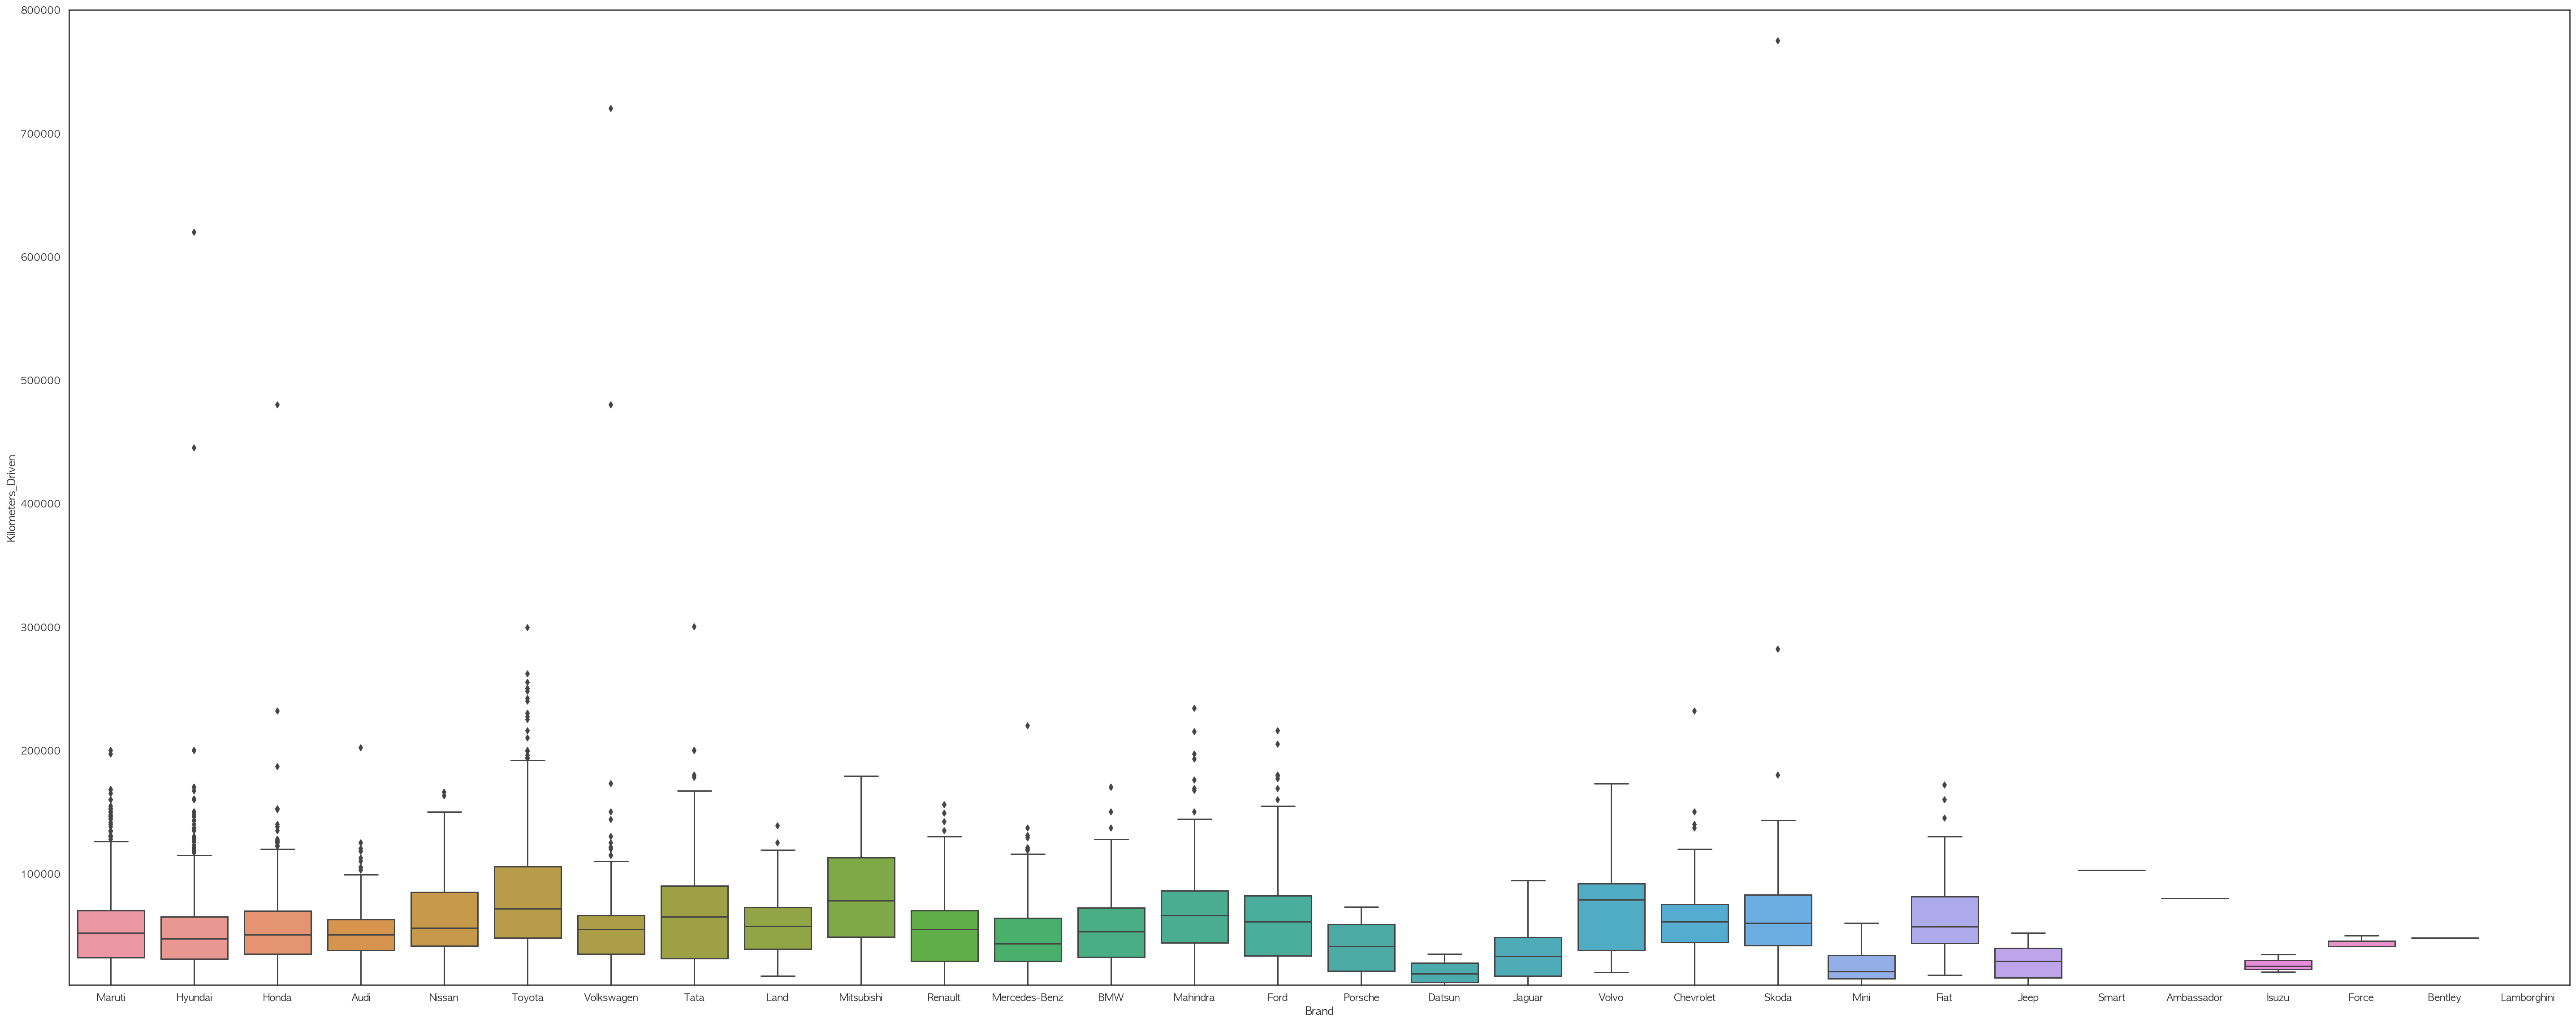

In [49]:
plt.figure(figsize=(50,20))
plt.axis([0, 5, 10000, 800000]) # 축범위 지정 [x최소값,x최대값,y최소값, y최대값]
sns.boxplot(x='Brand', y='Kilometers_Driven', data=car_t_l)
plt.show()

In [50]:
# Kilometers_Driven > 300000 이상치 제거 
# 엔진을 빼니 성능이 하락한 모습을 보여줌
car_t_l_d = car_t_l.drop(car_t_l[car_t_l['Kilometers_Driven'] > 300000].index)
car_t_l_d.reset_index(drop=True, inplace=True)

x = car_t_l_d.drop(['Name', 'Location', 'New_Price', 'Brand', 'Car_name', 'Price', 'Eng'], axis=1)
y = car_t_l_d['Price']

get_results(x, y)

explained_variance_score: 0.6027851644780831
mean_squared_errors: 37.36087788743947
r2_score: 0.6021625059110776


In [51]:
# 범위를 더 넓혀서 Kilometers_Driven > 800000 이상치 제거 
# 범위를 넓히니 성능이 향상!
car_t_l_d2 = car_t_l.drop(car_t_l[car_t_l['Kilometers_Driven'] > 800000].index)
car_t_l_d2.reset_index(drop=True, inplace=True)

x = car_t_l_d2.drop(['Name', 'Location', 'New_Price', 'Brand', 'Car_name', 'Price', 'Eng'], axis=1)
y = car_t_l_d2['Price']

get_results(x, y)

explained_variance_score: 0.7477021106296402
mean_squared_errors: 24.810615001559185
r2_score: 0.747627307670456


In [52]:
# 엔진을 제거 하지 않으니 성능이 살짝 향상 된 것을 확인
car_t_l_d2 = car_t_l.drop(car_t_l[car_t_l['Kilometers_Driven'] > 800000].index)
car_t_l_d2.reset_index(drop=True, inplace=True)

x = car_t_l_d2.drop(['Name', 'Location', 'New_Price', 'Brand', 'Car_name', 'Price'], axis=1)
y = car_t_l_d2['Price']

get_results(x, y)

explained_variance_score: 0.74791071864118
mean_squared_errors: 24.77963260876486
r2_score: 0.7478409188040092


### 2-7. Min Max Scaler

In [53]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

y = car_t_l_d2[['Price']]
y.shape

(6016, 1)

In [54]:
x = mm.fit_transform(car_t_l_d2.drop(['Name', 'Location', 'New_Price', 'Brand', 'Car_name', 'Price'], axis=1))
y = mm.fit_transform(car_t_l_d2[['Price']])

get_results(x, y)

explained_variance_score: 0.7479107186411784
mean_squared_errors: 0.0009733001892380216
r2_score: 0.747840918804008


- explained variance score : 0.75 
- mean_squared_errors : 0.00097 (실로 엄청난 점수)
- r2 socre (모형의 적합도, 설명력) : 0.75 (거의 사기적인 점수)

### 2-8. PCA

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

x = mm.fit_transform(car_t_l_d2.drop(['Name', 'Location', 'New_Price', 'Brand', 'Car_name', 'Price'], axis=1))
y = mm.fit_transform(car_t_l_d2[['Price']])

principals = pca.fit_transform(x)
principals_df = pd.DataFrame(data=principals, columns=['principal_component'])

get_results(principals, y)

explained_variance_score: -0.9403691362951316
mean_squared_errors: 0.003092854798338775
r2_score: -0.9409303394877258


In [56]:
# 주성분 분석 결과 데이터 프레임으로 정리 
principals_df

principal_component
0               -0.406096
1                0.195586
2               -0.861485
3                0.223487
4                1.197420
...                   ...
6011             0.218323
6012             0.189116
6013             0.411616
6014            -0.965691
6015             0.378051

[6016 rows x 1 columns]

In [57]:
principals_df['Price'] = y

In [58]:
principals_df

principal_component     Price
0               -0.406096  0.008210
1                0.195586  0.075583
2               -0.861485  0.025445
3                0.223487  0.034846
4                1.197420  0.108423
...                   ...       ...
6011             0.218323  0.027012
6012             0.189116  0.022311
6013             0.411616  0.015417
6014            -0.965691  0.013851
6015             0.378051  0.012911

[6016 rows x 2 columns]

<AxesSubplot:xlabel='principal_component', ylabel='Price'>

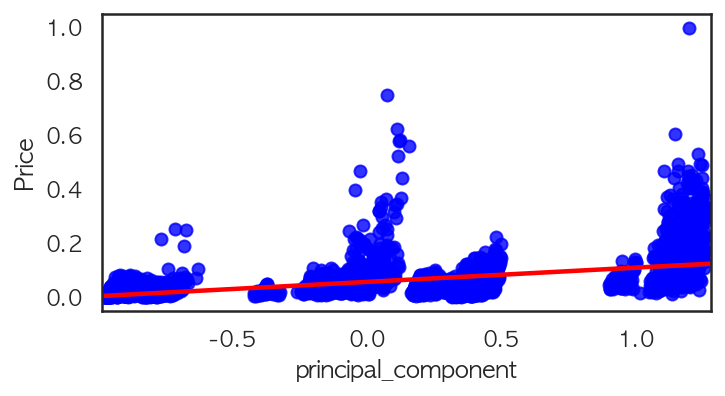

In [59]:
# 위 사항을 그래프로 표현
plt.figure(figsize=(12,6))

plt.subplot(221)
sns.regplot(x='principal_component', y='Price', data=principals_df, scatter_kws={'color':'blue'},
           line_kws={'color':'red'})

### 2-9. 교차 검증
- K개의 fold를 만들어서 진행하는 교차검증
  - 총 데이터 갯수가 적은 데이터 셋에 대해 정확도를 향사 시킬수 있음
  - 기존에 Training/Validation/Test 세 개의 집단으로 분류하는 것보다, Training과 Test로만 분류할 때 학습 데이터 셋이 더 많기 때문
  - 데이터 수가 적은데 검증과 테스트에 데이터를 더 뺏기면 underfitting 등 성능이 미달되는 모델이 학습됨.

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [61]:
skf = StratifiedKFold(n_splits=5)
kf = KFold(n_splits=5)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)
   
reg = LinearRegression()   
reg.fit(x_train, y_train)

pred_test = reg.predict(x_test)

print('explained_variance_score: {}'.format(explained_variance_score(pred_test, y_test)))
print('mean_squared_errors: {}'.format(mean_squared_error(pred_test, y_test)))
print('r2_score: {}'.format(r2_score(pred_test, y_test)))

explained_variance_score: 0.7479107186411784
mean_squared_errors: 0.0009733001892380216
r2_score: 0.747840918804008


In [63]:
cross_validate(reg, x, y, cv=kf)

{'fit_time': array([0.00637197, 0.00455999, 0.00436711, 0.00437188, 0.004704  ]),
 'score_time': array([0.00053   , 0.00054288, 0.0004847 , 0.000489  , 0.00048804]),
 'test_score': array([0.78115592, 0.76220946, 0.78298467, 0.71557769, 0.79112055])}

In [64]:
# 모델의 평가 0.77
score = cross_val_score(reg, x, y, cv=kf)
score.mean()

0.7666096570153279

### 2-10. 계산

In [65]:
# pp = reg.predict(a[[-1]]) * 100000 * 15

In [66]:
xx = mm.fit(car_t_l_d2.drop(['Name', 'Location', 'New_Price', 'Brand', 'Car_name', 'Price'], axis=1))
x = xx.transform(car_t_l_d2.drop(['Name', 'Location', 'New_Price', 'Brand', 'Car_name', 'Price'], axis=1))
yy = mm.fit(car_t_l_d2[['Price']])
y = yy.transform(car_t_l_d2[['Price']])

get_results(x, y)

explained_variance_score: 0.7479107186411784
mean_squared_errors: 0.0009733001892380216
r2_score: 0.747840918804008


In [67]:
pcar = np.array([[2013, 120000, 5, 10, 1995, 180, 
                  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
                  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                  1, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [68]:
hyun = np.array([[2014, 43000, 5, 18.9, 1197, 81, 
                 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [69]:
pd.DataFrame(pcar)

0       1   2   3     4    5   6   7   8   9   10  11  12  13  14  15  \
0  2013  120000   5  10  1995  180   0   0   0   0   0   0   0   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  
0   0   0   1   0   0   1   0   3   0   0   0   0   0   0   0   0   0   0   0

In [70]:
xx = mm.fit(car_t_l_d2.drop(['Name', 'Location', 'New_Price', 'Brand', 'Car_name', 'Price'], axis=1))

In [71]:
pcar_m = xx.transform(pd.DataFrame(pcar))

In [72]:
hyun_m = xx.transform(pd.DataFrame(hyun))

In [73]:
pcar_m_m = reg.predict(pcar_m)

In [74]:
hyun_m_m = reg.predict(hyun_m)

In [75]:
yy = mm.fit(car_t_l_d2[['Price']])

In [76]:
yy.inverse_transform(pcar_m_m)*100000*15

array([[19087395.25561726]])

In [77]:
yy.inverse_transform(hyun_m_m)

array([[3.50797337]])

In [78]:
car_t_l_d2.drop(['Name', 'Location', 'New_Price', 'Brand', 'Car_name', 'Price'], axis=1)

Year  Kilometers_Driven  Seats    Mile     Eng     Pow  Ambassador  \
0     2010              72000      5  43.624   998.0   58.16           0   
1     2015              41000      5  19.670  1582.0  126.20           0   
2     2011              46000      5  18.200  1199.0   88.70           0   
3     2012              87000      7  20.770  1248.0   88.76           0   
4     2013              40670      5  15.200  1968.0  140.80           0   
...    ...                ...    ...     ...     ...     ...         ...   
6011  2014              27365      5  28.400  1248.0   74.00           0   
6012  2015             100000      5  24.400  1120.0   71.00           0   
6013  2012              55000      8  14.000  2498.0  112.00           0   
6014  2013              46000      5  18.900   998.0   67.10           0   
6015  2011              47000      5  25.440   936.0   57.60           0   

      Audi  BMW  Bentley  Chevrolet  Datsun  Fiat  Force  Ford  Honda  \
0        0    0        0          0       0     0      0     0      0   
1        0    0        0          0       0     0      0     0      0   
2        0    0        0          0       0     0      0     0      1   
3        0    0        0          0       0     0      0     0      0   
4        1    0        0          0       0     0      0     0      0   
...    ...  ...      ...        ...     ...   ...    ...   ...    ...   
6011     0    0        0          0       0     0      0     0      0   
6012     0    0        0          0       0     0      0     0      0   
6013     0    0        0          0       0     0      0     0      0   
6014     0    0        0          0       0     0      0     0      0   
6015     0    0        0          1       0     0      0     0      0   

      Hyundai  Isuzu  Jaguar  Jeep  Lamborghini  Land  Mahindra  Maruti  \
0           0      0       0     0            0     0         0       1   
1           1      0       0     0            0     0         0       0   
2           0      0       0     0            0     0         0       0   
3           0      0       0     0            0     0         0       1   
4           0      0       0     0            0     0         0       0   
...       ...    ...     ...   ...          ...   ...       ...     ...   
6011        0      0       0     0            0     0         0       1   
6012        1      0       0     0            0     0         0       0   
6013        0      0       0     0            0     0         1       0   
6014        0      0       0     0            0     0         0       1   
6015        0      0       0     0            0     0         0       0   

      Mercedes-Benz  Mini  Mitsubishi  Nissan  Porsche  Renault  Skoda  Smart  \
0                 0     0           0       0        0        0      0      0   
1                 0     0           0       0        0        0      0      0   
2                 0     0           0       0        0        0      0      0   
3                 0     0           0       0        0        0      0      0   
4                 0     0           0       0        0        0      0      0   
...             ...   ...         ...     ...      ...      ...    ...    ...   
6011              0     0           0       0        0        0      0      0   
6012              0     0           0       0        0        0      0      0   
6013              0     0           0       0        0        0      0      0   
6014              0     0           0       0        0        0      0      0   
6015              0     0           0       0        0        0      0      0   

      Tata  Toyota  Volkswagen  Volvo  CNG  Diesel  LPG  Petrol  Automatic  \
0        0       0           0      0    1       0    0       0          0   
1        0       0           0      0    0       1    0       0          0   
2        0       0           0      0    0       0    0       1          0   
3        0       0           0

### 2-11. 그래프

In [79]:
x = mm.fit_transform(car_t_l_d2.drop(['Name', 'Location', 'New_Price', 'Brand', 'Car_name', 'Price'], axis=1))
y = mm.fit_transform(car_t_l_d2[['Price']])

In [80]:
x_ls = []

In [81]:
y_ls = []

In [82]:
for i in range(0, 6016):
    x_ls.append(x[i][2])

In [83]:
for i in range(0, 6016):
    y_ls.append(y[i])

<AxesSubplot:>

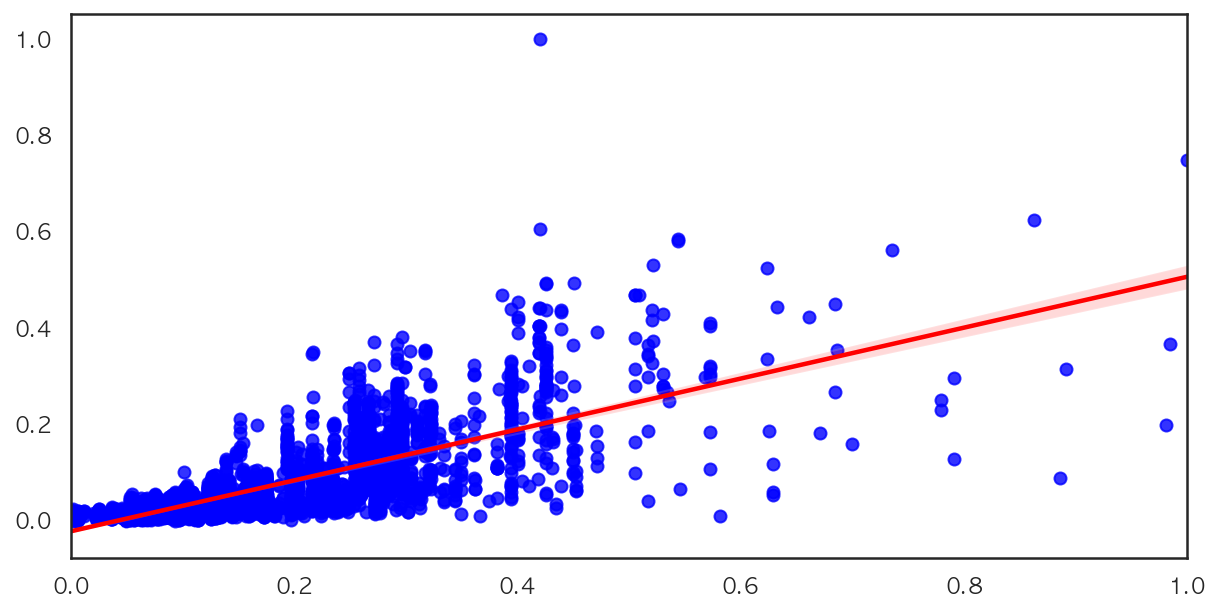

In [93]:
plt.figure(figsize=(10,5))
sns.regplot(x=x_ls, y=y_ls, scatter_kws={'color':'blue'}, line_kws={'color':'red'})

0


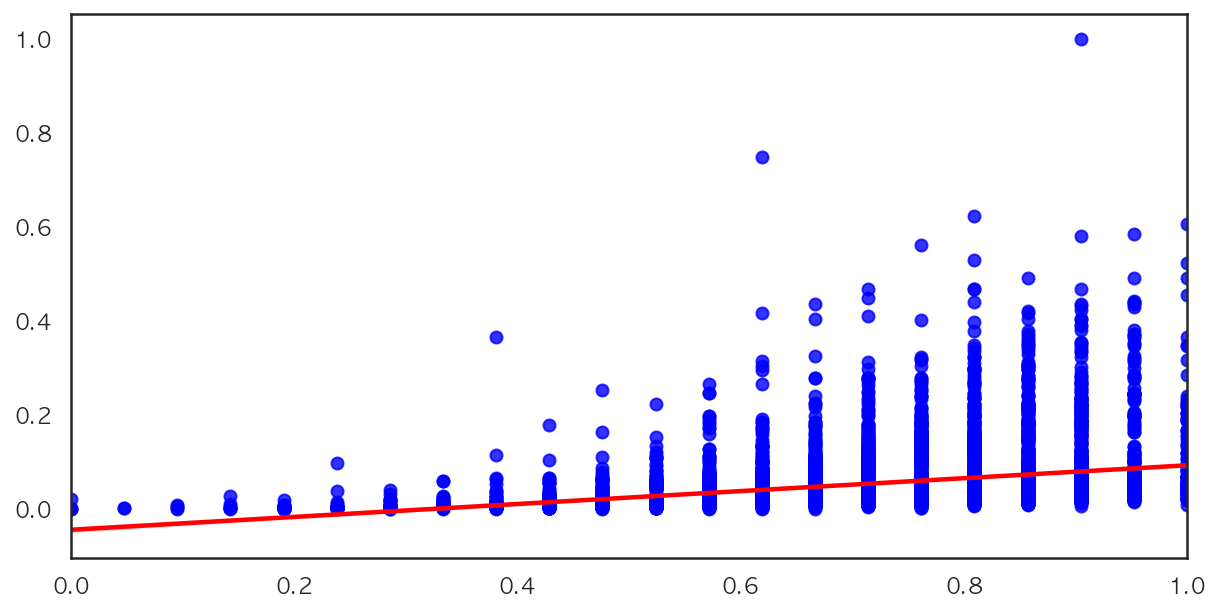

1


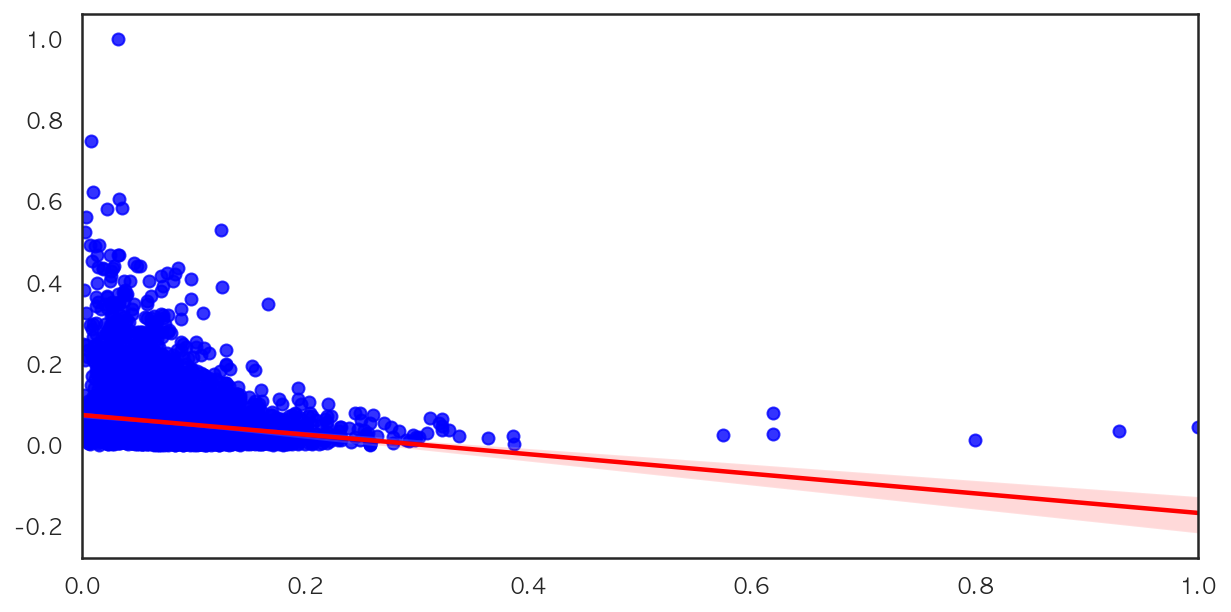

2


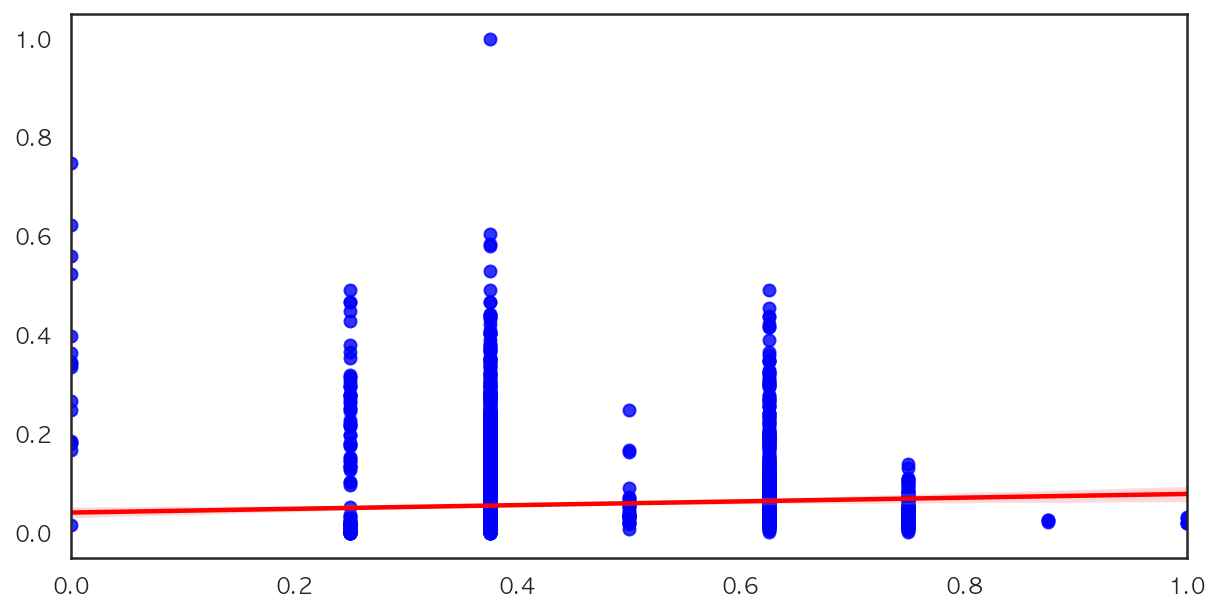

3


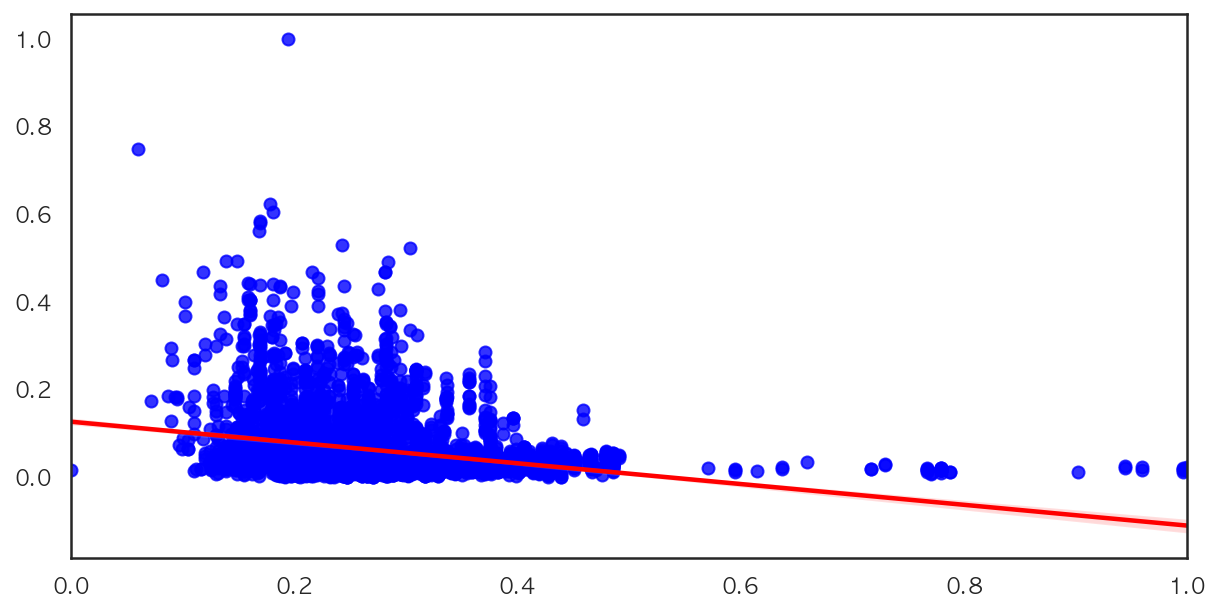

4


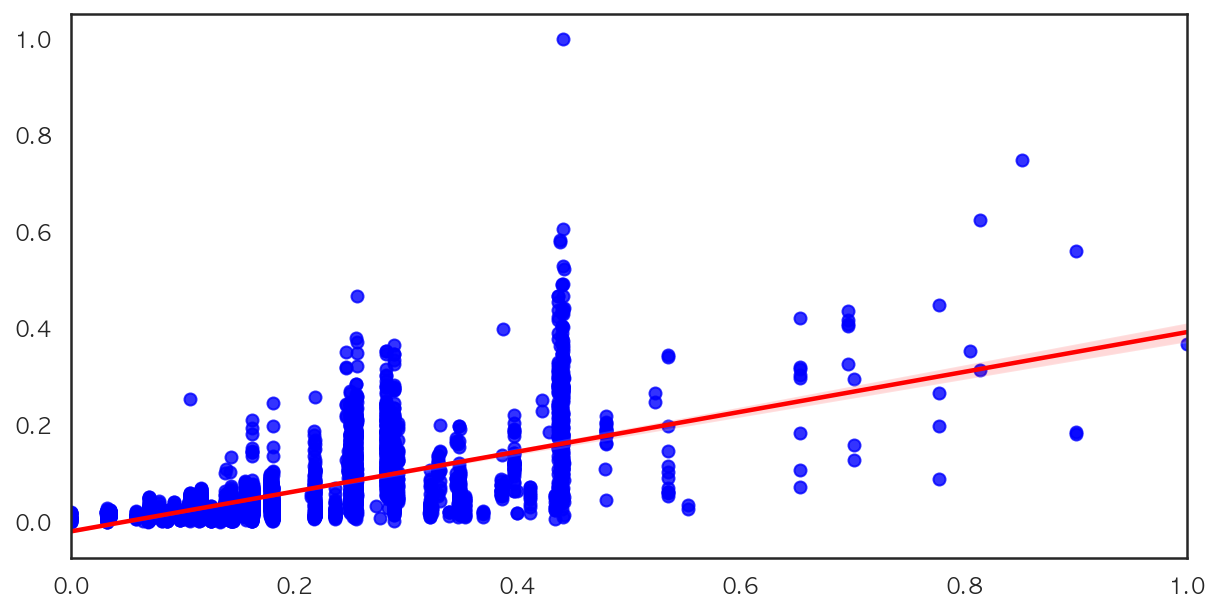

5


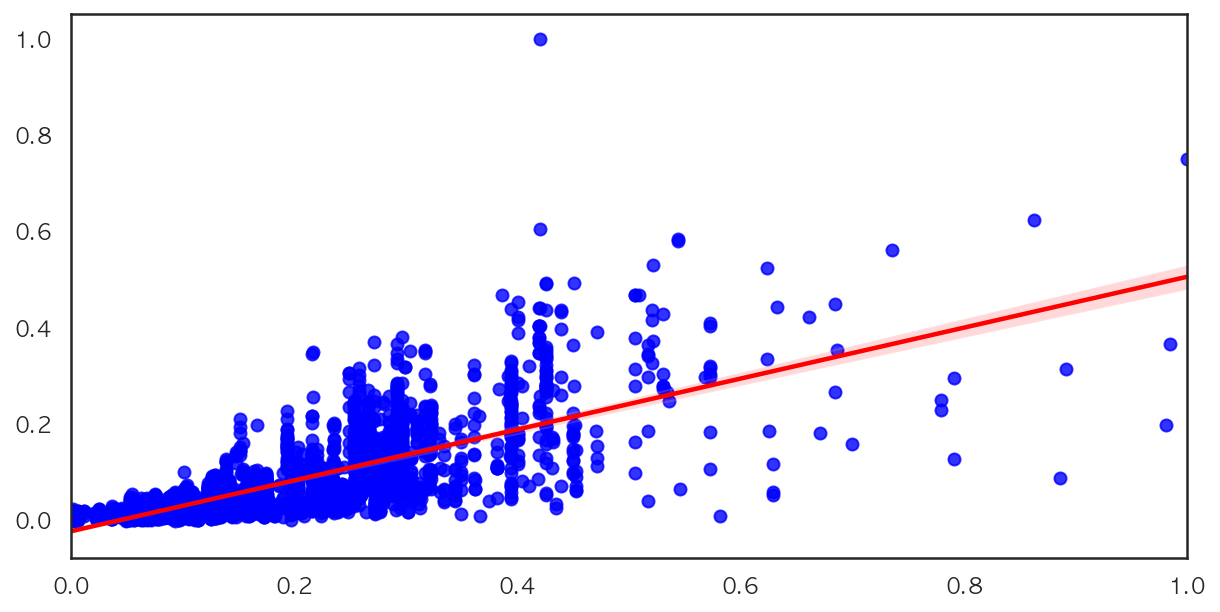

In [94]:
for k in range(0, 6):
    print(k)
    x_ls = []
    
    y_ls = []
    
    for i in range(0,6016):
        x_ls.append(x[i][k])
        
    for i in range(0,6016):
        y_ls.append(y[i])
        
    plt.figure(figsize=(10,5))
    sns.regplot(x=x_ls, y=y_ls, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
    plt.show()

In [86]:
# def get_results2(x, y):

#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

#     reg = LinearRegression()
#     reg.fit(x_train, y_train)

#     pred_test = reg.predict(x_test)

    
#     return(mean_squared_error(pred_test, y_test))

In [87]:
# ls_1000 = []

In [88]:
# for _ in range(0,10000):
#     car_8s = car_t[car_t['New_Price'].isnull()].sample(n=823)

#     car_8s.reset_index(drop=True, inplace=True)

#     x = car_8s.drop(['Price','Name','Location','New_Price','Brand','Car_name'], axis=1)
#     y = car_8s['Price']

#     ls_1000.append(get_results2(x, y))

In [89]:
# ls_1000_pd = pd.DataFrame(ls_1000)

In [90]:
# len(ls_1000_pd)

#### 10% 확률로 new_price를 넣었을 때 모델 성능이 좋음.

In [91]:
# len(ls_1000_pd[ls_1000_pd[0]>=46])/100